# Farah Hatem        46-9448
# Mo'men Barakat  46-8275
# Waad Abdelaziz   46-5078
# Abdelaziz Gohar   46-18335



# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

In [1]:
# Modules we'll use
import pandas as pd
import numpy as np
# For min_max scaling
from sklearn.preprocessing import MinMaxScaler
# For z-score scaling
from sklearn.preprocessing import StandardScaler
# For Box-Cox Normalization
from scipy import stats
# For Label Encoding
from sklearn import preprocessing
# Plotting modules
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import datetime
import datetime as dt
#from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
from sklearn.impute import KNNImputer
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# 1 - Extraction

In [2]:
df=pd.read_csv("UK_Accidents_1981.csv")  #Reading the dataset.


# 2- EDA

In [3]:
df.head() #Getting the first 5 rows from the dataset.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,NaN,NaN,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,-1,-1,A,121.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,NaN,NaN,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,-1,-1,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,NaN,NaN,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,-1,-1,B,377.0,NaN,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Raining no high winds,Wet or damp,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,NaN,NaN,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,-1,-1,A,4127.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Wet or damp,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,NaN,NaN,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,-1,-1,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Wet or damp,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1


In [4]:
df.index  #starting from index 0 till 248276 which is the number of rows

RangeIndex(start=0, stop=248276, step=1)

In [5]:
df.info() #Getting some information about the data such as the type and how many non-null data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248276 entries, 0 to 248275
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               248276 non-null  object 
 1   accident_year                                248276 non-null  int64  
 2   accident_reference                           248276 non-null  object 
 3   location_easting_osgr                        248193 non-null  float64
 4   location_northing_osgr                       248193 non-null  float64
 5   longitude                                    0 non-null       float64
 6   latitude                                     0 non-null       float64
 7   police_force                                 248276 non-null  object 
 8   accident_severity                            248276 non-null  object 
 9   number_of_vehicles                           248276 non-nul

In [6]:
df.shape #Getting number of rows and columns.

(248276, 36)

In [7]:
df.describe()  #Getting some characterstics of the data.

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,local_authority_ons_district,local_authority_highway,speed_limit,lsoa_of_accident_location
count,248276.0,248193.000000,248193.000000,0.0,0.0,248276.000000,248276.000000,248276.0,248276.0,248276.000000,248276.0
mean,1981.0,383399.933519,342966.804261,NaN,NaN,1.682494,1.308383,-1.0,-1.0,38.186732,-1.0
std,0.0,127691.143290,214505.397728,NaN,NaN,0.705455,0.812953,0.0,0.0,13.509403,0.0
min,1981.0,1170.000000,500.000000,NaN,NaN,1.000000,1.000000,-1.0,-1.0,0.000000,-1.0
25%,1981.0,324170.000000,176500.000000,NaN,NaN,1.000000,1.000000,-1.0,-1.0,30.000000,-1.0
50%,1981.0,395060.000000,308850.000000,NaN,NaN,2.000000,1.000000,-1.0,-1.0,30.000000,-1.0
75%,1981.0,458980.000000,431580.000000,NaN,NaN,2.000000,1.000000,-1.0,-1.0,40.000000,-1.0
max,1981.0,998900.000000,999900.000000,NaN,NaN,56.000000,62.000000,-1.0,-1.0,70.000000,-1.0


In [8]:
df.nunique() #Getting the unique values for each column.

accident_index                                 248276
accident_year                                       1
accident_reference                             248276
location_easting_osgr                           37982
location_northing_osgr                          42452
longitude                                           0
latitude                                            0
police_force                                       51
accident_severity                                   3
number_of_vehicles                                 18
number_of_casualties                               31
date                                              365
day_of_week                                         7
time                                             1397
local_authority_district                          464
local_authority_ons_district                        1
local_authority_highway                             1
first_road_class                                    7
first_road_number           

# 3 - Cleaning Data

## Observing and Handling Missing Data

In [9]:
df_new=df.replace('Data missing or out of range',np.nan)
df_new=df_new.replace('-1',np.nan)
df_new=df_new.replace(-1,np.nan)
df_new
#Before counting missing values, we were trying to replace the missing data with a value in which the program can count as a missing value
#it counts the empty cells and nan only so we replaced all missing data with nan.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,NaN,NaN,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,NaN,NaN,A,121.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None,NaN,NaN,NaN,NaN
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,NaN,NaN,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,NaN,NaN,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None,NaN,NaN,NaN,NaN
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,NaN,NaN,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,NaN,NaN,B,377.0,NaN,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None,NaN,NaN,NaN,NaN
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,NaN,NaN,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,NaN,NaN,A,4127.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None,NaN,NaN,NaN,NaN
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,NaN,NaN,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,NaN,NaN,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,308200.0,602700.0,NaN,NaN,Dumfries and Galloway,Slight,1,1,24/12/1981,Thursday,01:30,859,NaN,NaN,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,NaN,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,Other object on road,NaN,NaN,NaN,NaN
248272,1981981772644,1981,981772644,247710.0,546500.0,NaN,NaN,Dumfries and Galloway,Serious,2,1,11/12/1981,Friday,23:10,856,NaN,NaN,B,7004.0,Single carriageway,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,NaN,NaN,NaN,NaN
248273,1981981773645,1981,981773645,237800.0,556900.0,NaN,NaN,Dumfries and Galloway,Slight,1,2,25/12/1981,Friday,15:30,856,NaN,NaN,B,733.0,Single carriageway,60.0,Not at junction or within 20 metres,NaN,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,NaN,NaN,NaN,NaN
248274,1981981774646,1981,981774646,213200.0,558200.0,NaN,NaN,Dumfries and Galloway,Serious,2,1,21/12/1981,Monday,18:30,856,NaN,NaN,A,75.0,Single carriageway,60.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None,NaN,NaN,NaN,NaN


In [10]:
Missing_count=df_new.isnull().sum() #Counting misssing values in each column
Missing_count

accident_index                                      0
accident_year                                       0
accident_reference                                  0
location_easting_osgr                              83
location_northing_osgr                             83
longitude                                      248276
latitude                                       248276
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                   248276
local_authority_highway                        248276
first_road_class                                    1
first_road_number           

In [11]:
df_new.isnull().mean()*100 #Getting the percentage of missing data in each column.

accident_index                                   0.000000
accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.033431
location_northing_osgr                           0.033431
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                   100.000000
local_authority_highway                        100.000000
first_road_cla

In [12]:
#identifying columns that contain upto 5 percent missing data 
cols_upto_5=[var for var in df_new.columns if df_new[var].isnull().mean() < 0.05 and 
            df_new[var].isnull().mean() > 0]

cols_upto_5

['location_easting_osgr',
 'location_northing_osgr',
 'first_road_class',
 'first_road_number',
 'junction_detail',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'carriageway_hazards']

In [13]:
# how many total missing values do we have?
total_cells = np.product(df_new.shape)
total_missing = Missing_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

28.240871270503614

In [14]:
df_new=df_new.dropna(axis='index',how='any',subset=['location_easting_osgr','location_northing_osgr',
 'first_road_number','junction_detail',
 'light_conditions','weather_conditions',
 'road_surface_conditions','carriageway_hazards'])
print(df_new)
#Removing all rows which have any column with less than 5% missing data.

       accident_index  accident_year accident_reference  \
0       198101A1AJF60           1981          01A1AJF60   
1       198101A1AKF27           1981          01A1AKF27   
2       198101A1ALK52           1981          01A1ALK52   
3       198101A1BBE59           1981          01A1BBE59   
4       198101A1BCC73           1981          01A1BCC73   
...               ...            ...                ...   
248271  1981981771643           1981          981771643   
248272  1981981772644           1981          981772644   
248273  1981981773645           1981          981773645   
248274  1981981774646           1981          981774646   
248275  198198T760257           1981          98T760257   

        location_easting_osgr  location_northing_osgr  longitude  latitude  \
0                    409490.0                430000.0        NaN       NaN   
1                    343790.0                747000.0        NaN       NaN   
2                     92370.0                202000.0    

In [15]:
df_new.shape #getting the new number of rows and columns after removing some rows.

(247363, 36)

In [16]:
((248277-247363)/247363)*100   #We are making sure that after removing some rows, no more than 5% of the whole data were removed


0.3694974591996378

In [17]:
Missing_count=df_new.isnull().sum() #Counting misssing values in each column after removing some rows.
Missing_count

accident_index                                      0
accident_year                                       0
accident_reference                                  0
location_easting_osgr                               0
location_northing_osgr                              0
longitude                                      247363
latitude                                       247363
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                   247363
local_authority_highway                        247363
first_road_class                                    0
first_road_number           

In [18]:
df_new.isnull().mean()*100 #percentage of missing data after removing some rows.

accident_index                                   0.000000
accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.000000
location_northing_osgr                           0.000000
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                   100.000000
local_authority_highway                        100.000000
first_road_cla

In [19]:
#identifying columns that contain upto 70 percent missing data 
cols_upto_70=[var for var in df_new.columns if df_new[var].isnull().mean() > 0.7 and 
            df_new[var].isnull().mean() < 100]

cols_upto_70

['longitude',
 'latitude',
 'local_authority_ons_district',
 'local_authority_highway',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [20]:
for i in range(len(cols_upto_70)):
  df_new.drop(cols_upto_70[i], inplace=True, axis=1)

df_new.isnull()
#Looping on the whole data and setting the null data as true and the non-null as false.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
248272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
248273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
248274,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df_new.shape #Getting the new number of rows and columns after removing columns which contains more than 70% missing data.

(247363, 28)

In [22]:
Missing_count=df_new.isnull().sum() #Counting misssing values in each column after removing columns which contains more than 70% missing data.
Missing_count

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                           0
location_northing_osgr                          0
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
first_road_class                                0
first_road_number                               0
road_type                                   25589
speed_limit                                     0
junction_detail                                 0
junction_control                           103618
second_road_class                          135815


In [23]:
df_new.isnull().mean()*100  #Counting percentage of misssing values in each column after removing columns which contains more than 70% missing data.

accident_index                              0.000000
accident_year                               0.000000
accident_reference                          0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                  10.344716
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.

In [24]:
df_new[df_new["road_type"].isnull()].head()  #Now we are trying to fix the problem of missing data with percentage more than 5%
#and less than 70%, first, the road type has aproximately 10% missing data, so we get the first 5 columns with the road type missing 
#trying to figure out whether there is a relation with another columns to know the reason behind it being missing.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,NaN,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
5,198101A1BCU66,1981,01A1BCU66,427170.0,316000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,01:10,Greenwich,Unclassified,first_road_class is C or Unclassified. These r...,NaN,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
6,198101A1BDE07,1981,01A1BDE07,325560.0,347000.0,Metropolitan Police,Serious,2,1,01/01/1981,Thursday,01:15,Croydon,A,235.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None


In [25]:
df_new[df_new["road_type"].isnull()]["second_road_class"].value_counts() #We thought that the second road class is related 
#with the road type so we are calculating how many missing road type for each second road class, we figured out that there is no relation 
#so actually we cant find a reason why those data are missing.

Unclassified    415
A                49
B                18
C                10
Motorway          2
A(M)              1
Name: second_road_class, dtype: int64

In [26]:
df_new['road_type']=df_new.road_type.fillna('missing')
df_new
#So we used arbitrary value to fill in the missing data.


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,308200.0,602700.0,Dumfries and Galloway,Slight,1,1,24/12/1981,Thursday,01:30,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,NaN,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,Other object on road
248272,1981981772644,1981,981772644,247710.0,546500.0,Dumfries and Galloway,Serious,2,1,11/12/1981,Friday,23:10,856,B,7004.0,Single carriageway,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None
248273,1981981773645,1981,981773645,237800.0,556900.0,Dumfries and Galloway,Slight,1,2,25/12/1981,Friday,15:30,856,B,733.0,Single carriageway,60.0,Not at junction or within 20 metres,NaN,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
248274,1981981774646,1981,981774646,213200.0,558200.0,Dumfries and Galloway,Serious,2,1,21/12/1981,Monday,18:30,856,A,75.0,Single carriageway,60.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None


In [27]:
Missing_count=df_new.isnull().sum() #Counting misssing values in each column after filling missing data in road type column to make sure that no more missing data counted in this clumn.
Missing_count

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                           0
location_northing_osgr                          0
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
first_road_class                                0
first_road_number                               0
road_type                                       0
speed_limit                                     0
junction_detail                                 0
junction_control                           103618
second_road_class                          135815


In [28]:
df_new.isnull().mean()*100 #Getting the corresponding percentage.

accident_index                              0.000000
accident_year                               0.000000
accident_reference                          0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                   0.000000
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.

In [29]:
df_new[df_new["junction_control"].isnull()].head() #Getting some of the rows which has the junction control missing to find out why it is missing.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
5,198101A1BCU66,1981,01A1BCU66,427170.0,316000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,01:10,Greenwich,Unclassified,first_road_class is C or Unclassified. These r...,missing,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
7,198101A1BDK13,1981,01A1BDK13,301860.0,423000.0,Metropolitan Police,Serious,2,6,01/01/1981,Thursday,01:15,Sutton,B,272.0,missing,30.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
8,198101A1BHC47,1981,01A1BHC47,367380.0,467000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:35,Hackney,A,102.0,Dual carriageway,40.0,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None


In [30]:
df_new[df_new["junction_control"].isnull()]["junction_detail"].value_counts() #As shown here most of the rows which has the junction 
#control missing are of type not a junction or within 20 meters, so actullay there no junction control for these rows because
#it is not a junction.

Not at junction or within 20 metres    103526
T or staggered junction                    53
Other junction                             17
Private drive or entrance                   9
Crossroads                                  6
Roundabout                                  4
Slip road                                   2
More than 4 arms (not roundabout)           1
Name: junction_detail, dtype: int64

In [31]:
modeJunction=df_new[df_new["junction_control"].isnull()]["junction_detail"].mode()[0]
modeJunction
#So we figured out that there is a reason behind those missing values of the junction control, so mode is the most suitable technique to
#be used because it is a good approach for the MNAR categorical data. So we calculated the mode of the junction detail when the 
#junction control was missing.

'Not at junction or within 20 metres'

In [32]:
df_new['junction_control']=df_new['junction_control'].fillna(modeJunction)
df_new
#After getting the mode we fillef all the empty and missing cells in the junction control column with the junction detail mode.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,308200.0,602700.0,Dumfries and Galloway,Slight,1,1,24/12/1981,Thursday,01:30,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,Not at junction or within 20 metres,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,Other object on road
248272,1981981772644,1981,981772644,247710.0,546500.0,Dumfries and Galloway,Serious,2,1,11/12/1981,Friday,23:10,856,B,7004.0,Single carriageway,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None
248273,1981981773645,1981,981773645,237800.0,556900.0,Dumfries and Galloway,Slight,1,2,25/12/1981,Friday,15:30,856,B,733.0,Single carriageway,60.0,Not at junction or within 20 metres,Not at junction or within 20 metres,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
248274,1981981774646,1981,981774646,213200.0,558200.0,Dumfries and Galloway,Serious,2,1,21/12/1981,Monday,18:30,856,A,75.0,Single carriageway,60.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None


In [33]:
df_new[df_new["second_road_number"].isnull()].head()  #We are trying to figure out why some of the second road number is missing.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,NaN,NaN,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None


In [34]:
df_new[df_new["second_road_class"].isnull()]["second_road_number"].value_counts()
#Both second road number and second road class have approixmetly 54% of missing data, so we thought that they are related, if the 
#second road class is missing then the second road number is missing, so we are trying to count for each second road class
#missing, it has how many second road number but as shown when we runned the cell, for each second road class missing there is no
#second road number because it is actually missing too. So yes when the second road class is missing the second road number is missing too.

Series([], Name: second_road_number, dtype: int64)

In [35]:
df_new[df_new["second_road_number"].isnull()]["pedestrian_crossing_human_control"].value_counts() 
#We are trying to figure out if the pedestrian_crossing_human_control column would help us to know why both second road class and number are missing.

None within 50 metres                 91834
Control by school crossing patrol       202
Control by other authorised person       95
Name: pedestrian_crossing_human_control, dtype: int64

In [36]:
df_new[df_new["second_road_number"].isnull()]["junction_control"].value_counts() 
##We are trying to figure out if the junction_control column would help us to know why both second road class and number are missing.

Not at junction or within 20 metres    103530
Give way or uncontrolled                24995
Auto traffic signal                      6855
Stop sign                                 366
Authorised person                          77
Name: junction_control, dtype: int64

In [37]:
modePedestrian=df_new[df_new["second_road_number"].isnull()]["pedestrian_crossing_human_control"].mode()[0]
modePedestrian
#We figured out that most of the missing second road number where when there is no pedestrian_crossing_human_control 
#within 50 metres, so we can fill the missing data in the second road number with the mode of pedestrian_crossing_human_control 
#column when the second road number was missing.

'None within 50 metres '

In [38]:
modepedestrian=df_new[df_new["second_road_class"].isnull()]["pedestrian_crossing_human_control"].mode()[0]
modepedestrian
#We figured out that most of the missing second road class where when there is no pedestrian_crossing_human_control 
#within 50 metres, so we can fill the missing data in the second road class with the mode of pedestrian_crossing_human_control 
#column when the second road class was missing.

'None within 50 metres '

In [39]:
df_new['second_road_number']=df_new['second_road_number'].fillna(modePedestrian)
df_new['second_road_class']=df_new['second_road_class'].fillna(modepedestrian)
df_new
#We filled the missing data in the second road class and number wirth the mode of pedestrian_crossing_human_control column 
#which is none within 50 metres.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,308200.0,602700.0,Dumfries and Galloway,Slight,1,1,24/12/1981,Thursday,01:30,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,Other object on road
248272,1981981772644,1981,981772644,247710.0,546500.0,Dumfries and Galloway,Serious,2,1,11/12/1981,Friday,23:10,856,B,7004.0,Single carriageway,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None
248273,1981981773645,1981,981773645,237800.0,556900.0,Dumfries and Galloway,Slight,1,2,25/12/1981,Friday,15:30,856,B,733.0,Single carriageway,60.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
248274,1981981774646,1981,981774646,213200.0,558200.0,Dumfries and Galloway,Serious,2,1,21/12/1981,Monday,18:30,856,A,75.0,Single carriageway,60.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None


In [40]:
Missing_count=df_new.isnull().sum() #Counting misssing values in each column after filling some columns with missing data.
Missing_count

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number  

In [41]:
df_new.isnull().mean()*100 # Getting the corresponding percentage.

accident_index                              0.000000
accident_year                               0.000000
accident_reference                          0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                   0.000000
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                            0.

In [42]:
df_new[df_new["pedestrian_crossing_human_control"].isnull()].head()
df_new
#Getting some rows containing the pedestrian_crossing_human_control column missing to figure out why they are missing.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,NaN,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,308200.0,602700.0,Dumfries and Galloway,Slight,1,1,24/12/1981,Thursday,01:30,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,Other object on road
248272,1981981772644,1981,981772644,247710.0,546500.0,Dumfries and Galloway,Serious,2,1,11/12/1981,Friday,23:10,856,B,7004.0,Single carriageway,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None
248273,1981981773645,1981,981773645,237800.0,556900.0,Dumfries and Galloway,Slight,1,2,25/12/1981,Friday,15:30,856,B,733.0,Single carriageway,60.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
248274,1981981774646,1981,981774646,213200.0,558200.0,Dumfries and Galloway,Serious,2,1,21/12/1981,Monday,18:30,856,A,75.0,Single carriageway,60.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None


In [43]:
df_new[df_new["pedestrian_crossing_human_control"].isnull()]["pedestrian_crossing_physical_facilities"].value_counts()
#Same idea as the second road class and number, both pedestrian_crossing_human_control and pedestrian_crossing_physical_facilities
#columns have the same percentage of missing data, so we figure out that they are related and that whenever there is a cell
#in the pedestrian_crossing_human_control missing the correspondding pedestrian_crossing_physical_facilities vell is missing too.

Series([], Name: pedestrian_crossing_physical_facilities, dtype: int64)

In [44]:
df_new['pedestrian_crossing_human_control']=df_new.road_type.fillna('missing')
df_new['pedestrian_crossing_physical_facilities']=df_new.road_type.fillna('missing')
df_new
#No relation between these two columns and other columns to figur out the reason behind them being missing and we cant figure out why
#they are msiing in general so we filled all the missing cells with arbitrary value missing to know that those were missing values
#and we substituted them with value missing.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Dry,NaN,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,None within 50 metres,None within 50 metres,Dual carriageway,Dual carriageway,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Single carriageway,Single carriageway,Darkness - lights lit,Other,Wet or damp,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,308200.0,602700.0,Dumfries and Galloway,Slight,1,1,24/12/1981,Thursday,01:30,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Dual carriageway,Dual carriageway,Darkness - no lighting,Fine no high winds,Wet or damp,None,Other object on road
248272,1981981772644,1981,981772644,247710.0,546500.0,Dumfries and Galloway,Serious,2,1,11/12/1981,Friday,23:10,856,B,7004.0,Single carriageway,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,Single carriageway,Darkness - lights lit,Fine no high winds,Frost or ice,None,None
248273,1981981773645,1981,981773645,237800.0,556900.0,Dumfries and Galloway,Slight,1,2,25/12/1981,Friday,15:30,856,B,733.0,Single carriageway,60.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Single carriageway,Single carriageway,Daylight,Fine no high winds,Dry,None,None
248274,1981981774646,1981,981774646,213200.0,558200.0,Dumfries and Galloway,Serious,2,1,21/12/1981,Monday,18:30,856,A,75.0,Single carriageway,60.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,Single carriageway,Darkness - no lighting,Raining no high winds,Wet or damp,None,None


In [45]:
Missing_count=df_new.isnull().sum() #Counting misssing values in each column after filling missing values in some columns.
Missing_count

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number  

In [46]:
 df_new.isnull().mean()*100  #Getting the corresponding percentage.

accident_index                              0.000000
accident_year                               0.000000
accident_reference                          0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                   0.000000
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                            0.

In [47]:
df_new[df_new["special_conditions_at_site"].isnull()].head()
#Trying to know why some of the special_conditions_at_site column is missing.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Dry,NaN,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,None within 50 metres,None within 50 metres,Dual carriageway,Dual carriageway,Darkness - lights lit,Other,Dry,NaN,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Wet or damp,NaN,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Single carriageway,Single carriageway,Darkness - lights lit,Other,Wet or damp,NaN,None


In [48]:
df_new[df_new["special_conditions_at_site"].isnull()]["carriageway_hazards"].value_counts()
#We are counting for each carriageway_hazard how many corresponding special_conditions_at_site missing
#and as shown most of the missing special_conditions_at_site were when there is no carriageway_hazards(none)

None                    46285
Other object on road      462
Dog on road               219
Other animal on road      114
Name: carriageway_hazards, dtype: int64

In [49]:
modeHazards=df_new[df_new["special_conditions_at_site"].isnull()]["carriageway_hazards"].mode()[0]
modeHazards
#So we calculated the mode of the carriageway_hazards when the special_conditions_at_site was missing.

'None'

In [50]:
df_new['special_conditions_at_site']=df_new['carriageway_hazards'].fillna(modeHazards)
df_new
#And we filled the empty and missing cells in special_conditions_at_site column with this mode.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,Metropolitan Police,Slight,3,1,01/01/1981,Thursday,00:45,Epping Forest,A,121.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Dry,None,None
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,Metropolitan Police,Slight,2,4,01/01/1981,Thursday,00:50,Enfield,A,10.0,Dual carriageway,40.0,Crossroads,Auto traffic signal,None within 50 metres,None within 50 metres,Dual carriageway,Dual carriageway,Darkness - lights lit,Other,Dry,None,None
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,Metropolitan Police,Slight,3,4,01/01/1981,Thursday,00:55,Hounslow,B,377.0,missing,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Raining no high winds,Wet or damp,None,None
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,Metropolitan Police,Slight,3,2,01/01/1981,Thursday,01:05,Hounslow,A,4127.0,missing,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Wet or damp,None,None
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,Metropolitan Police,Slight,1,1,01/01/1981,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,30.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Single carriageway,Single carriageway,Darkness - lights lit,Other,Wet or damp,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,308200.0,602700.0,Dumfries and Galloway,Slight,1,1,24/12/1981,Thursday,01:30,859,A,74.0,Dual carriageway,70.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Dual carriageway,Dual carriageway,Darkness - no lighting,Fine no high winds,Wet or damp,Other object on road,Other object on road
248272,1981981772644,1981,981772644,247710.0,546500.0,Dumfries and Galloway,Serious,2,1,11/12/1981,Friday,23:10,856,B,7004.0,Single carriageway,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,Single carriageway,Darkness - lights lit,Fine no high winds,Frost or ice,None,None
248273,1981981773645,1981,981773645,237800.0,556900.0,Dumfries and Galloway,Slight,1,2,25/12/1981,Friday,15:30,856,B,733.0,Single carriageway,60.0,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Single carriageway,Single carriageway,Daylight,Fine no high winds,Dry,None,None
248274,1981981774646,1981,981774646,213200.0,558200.0,Dumfries and Galloway,Serious,2,1,21/12/1981,Monday,18:30,856,A,75.0,Single carriageway,60.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,Single carriageway,Darkness - no lighting,Raining no high winds,Wet or damp,None,None


In [51]:
Missing_count=df_new.isnull().sum() #Counting misssing values in each column to make sure that we solved all missing data
Missing_count

accident_index                             0
accident_year                              0
accident_reference                         0
location_easting_osgr                      0
location_northing_osgr                     0
police_force                               0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
local_authority_district                   0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian

In [52]:
df_new.isnull().mean()*100  #those are the corresponding percentages.

accident_index                             0.0
accident_year                              0.0
accident_reference                         0.0
location_easting_osgr                      0.0
location_northing_osgr                     0.0
police_force                               0.0
accident_severity                          0.0
number_of_vehicles                         0.0
number_of_casualties                       0.0
date                                       0.0
day_of_week                                0.0
time                                       0.0
local_authority_district                   0.0
first_road_class                           0.0
first_road_number                          0.0
road_type                                  0.0
speed_limit                                0.0
junction_detail                            0.0
junction_control                           0.0
second_road_class                          0.0
second_road_number                         0.0
pedestrian_cr

1)Easting_location_osgr and northing_location_osgr are MCAR because there is no relation between the missing data and the other values within the dataset and no evidence for why they are missing, maybe they were missing because it was not recorded by those who were filling the survey.

2)Longitude and latitude are MAR because there is a relationship between missing values and the observed data, to be more clear, we can get both of them from easting_location_osgr and northing_location_osgr.

3)local_authority_ons_district and local_authority_highway are MCAR because there is noevidence why they are missing.

4)First_road_class is MCAR because there is no relation between the missing data and the other values within the dataset and no evidence for why they are missing, maybe they were missing because it was not recorded by those who were filling the survey.

5)Some of the first_road_number are MNAR because as mentioned in the dataset when the first_road_class is C or unclassified, then these roads have no official numbers so they are recorded as zero. The remaining missing data are MCAR because there no evidence why they are missing and there is no relation between them and the other observed data.

6)Some of the road_type values are MNAR because as mentioned in the dataset when the first_road_class is C or unclassified, then these roads have no official numbers so they are recorded as zero, so there is a reason for the missing data. Those data with empty boxes are MAR because we can guess them from the first_road_class.

7)Junction_control is MAR because we can guess the missing values from the junction_detail. 

8)second_road_number ,Second_road_class ,pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities are MNAR because there is a reason behind them being missing.

9)Light_conditions are MCAR.

10)Road_surface_Cnditions are MAR special_conditions_at_site MCAR carriageway_hazards MCAR.

11)Weather_conditions is MAR because there is no evidence why they ar missing but we can guess them from another observed data such as road_surface_conditions for example, if the road is wet then most probably it was raining.

12)There are missing data that are not counted in the previous part of the code because they are not nan or empty so it was not possible to detect them by any other way rather than by eye.

## Observing Duplicate Data

In [53]:
df_new.duplicated()   #Beside each column we are trying to identify wheather it is a duplicate or not by a boolean value true and false.

0         False
1         False
2         False
3         False
4         False
          ...  
248271    False
248272    False
248273    False
248274    False
248275    False
Length: 247363, dtype: bool

In [54]:
df_new.duplicated().sum()   # Getting the number of rows which are duplicates but there were no duplicate.

0

In [55]:
(~df_new.duplicated()).sum()  #We are making sure that there is no duplicate by getting the number of rows that are not duplicates
#and as shown there is 247363 rows which are not duplicates which is the total number of rows, so no duplicares are figured out. 

247363

## Observing outliers and handling outliers

In [56]:
df_new.nunique() 

accident_index                             247363
accident_year                                   1
accident_reference                         247363
location_easting_osgr                       37963
location_northing_osgr                      42385
police_force                                   51
accident_severity                               3
number_of_vehicles                             18
number_of_casualties                           31
date                                          365
day_of_week                                     7
time                                         1397
local_authority_district                      464
first_road_class                                6
first_road_number                            3434
road_type                                       5
speed_limit                                    23
junction_detail                                 9
junction_control                                5
second_road_class                               7


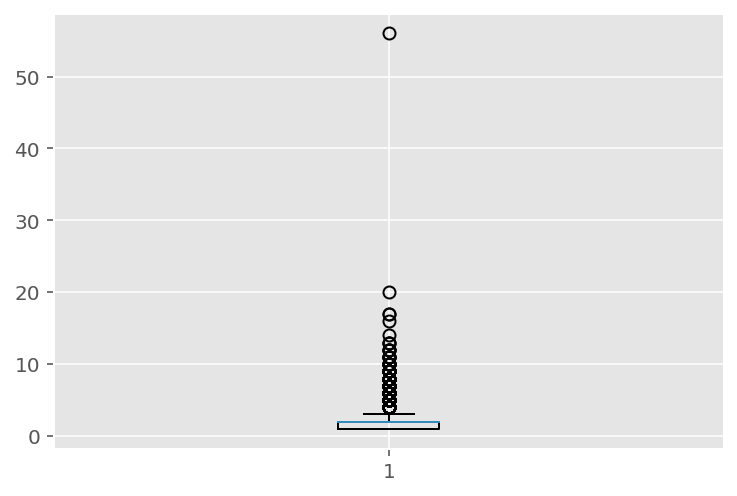

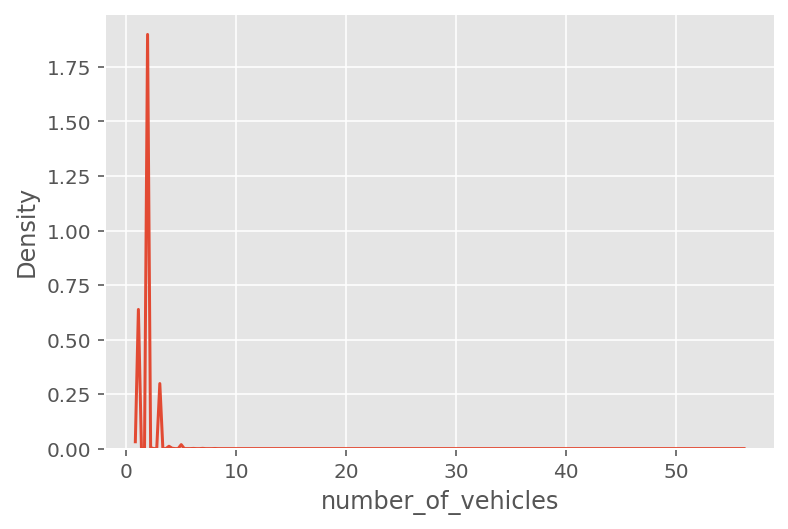

In [57]:
plt.boxplot(df_new.number_of_vehicles)     #In this part of the code we are observing outliers using boxplot and by observing the distribution of data using density plot.We only chose the 
plt.show()                                 #columns which contained the data as int or float as object data types we can not find outliers for them.
sns.kdeplot(df_new.number_of_vehicles)     #As shown in the next bar plot the column number of vehicles contains many outliers.In addition,the distribution is not well formed.
plt.show()

In [58]:
#Using IQR method    #Here we used the IQR method by getting the 1st and the 3rd quantiles.The difference between the 75th and 25th percentiles of the data.
Q1_vehicles = df_new.number_of_vehicles.quantile(0.25)
Q3_vehicles = df_new.number_of_vehicles.quantile(0.75)
IQR_vehicles = Q3_vehicles - Q1_vehicles
print(IQR_vehicles)

1.0


In [59]:
Lower_Limit_vehicles=Q1_vehicles - 1.5 * IQR_vehicles    #In this part we are getting the lower and upper limits.
Upper_Limit_vehicles=Q3_vehicles + 1.5 * IQR_vehicles    #we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. 
print(Lower_Limit_vehicles)   #This gives us the minimum and maximum fence posts that we compare each observation to. 
print(Upper_Limit_vehicles)   

-0.5
3.5


In [60]:
Upper_vehicles=df_new[df_new['number_of_vehicles'] > Upper_Limit_vehicles]    #Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
Lower_vehicles=df_new[df_new['number_of_vehicles'] < Lower_Limit_vehicles]    #Finally the total number of outliers has been calculated.
print('Total number of outliers are:',Upper_vehicles.shape[0]+Lower_vehicles.shape[0])

Total number of outliers are: 3809


In [61]:
cutoff_vehicles = df_new.number_of_vehicles.mean() + df_new.number_of_vehicles.std() * 3
cutoff_vehicles                              #Here we used the mean median imputation technique to clean outliers.We used..

3.799595366174026

In [62]:
df_med_imp = df_new.copy()        #In this part a new copy of the dataset is created and the number of vehicles outliers were replaced by median.
median_vehicles = df_new.number_of_vehicles.median()
cutoff_vehicles = df_new.number_of_vehicles.mean() + df_new.number_of_vehicles.std() * 3
df_med_imp["number_of_vehicles"] = np.where(df_med_imp["number_of_vehicles"]>cutoff_vehicles, median_vehicles, df_med_imp['number_of_vehicles'] )

In [63]:
df_new.describe()   #Here we were trying to see the mean and std before removing outliers.As shown mean is 1.682762 and std is 0.705611.

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit
count,247363.0,247363.000000,247363.000000,247363.000000,247363.000000,247363.000000
mean,1981.0,383286.548514,343152.925700,1.682762,1.308906,38.180848
std,0.0,127759.808473,214676.217924,0.705611,0.813808,13.505324
min,1981.0,1170.000000,500.000000,1.000000,1.000000,0.000000
25%,1981.0,324025.000000,176500.000000,1.000000,1.000000,30.000000
50%,1981.0,394940.000000,309000.000000,2.000000,1.000000,30.000000
75%,1981.0,458950.000000,431720.000000,2.000000,1.000000,40.000000
max,1981.0,998900.000000,999900.000000,56.000000,62.000000,70.000000


In [64]:
df_med_imp.describe()    #After the replacement of outliers the mean changed to 1.645096 and std to 0.593962 which is better than before.

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit
count,247363.0,247363.000000,247363.000000,247363.000000,247363.000000,247363.000000
mean,1981.0,383286.548514,343152.925700,1.645096,1.308906,38.180848
std,0.0,127759.808473,214676.217924,0.593962,0.813808,13.505324
min,1981.0,1170.000000,500.000000,1.000000,1.000000,0.000000
25%,1981.0,324025.000000,176500.000000,1.000000,1.000000,30.000000
50%,1981.0,394940.000000,309000.000000,2.000000,1.000000,30.000000
75%,1981.0,458950.000000,431720.000000,2.000000,1.000000,40.000000
max,1981.0,998900.000000,999900.000000,3.000000,62.000000,70.000000


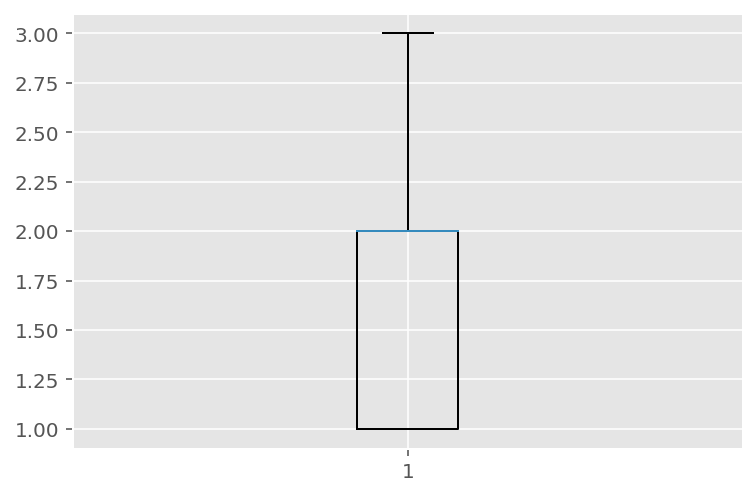

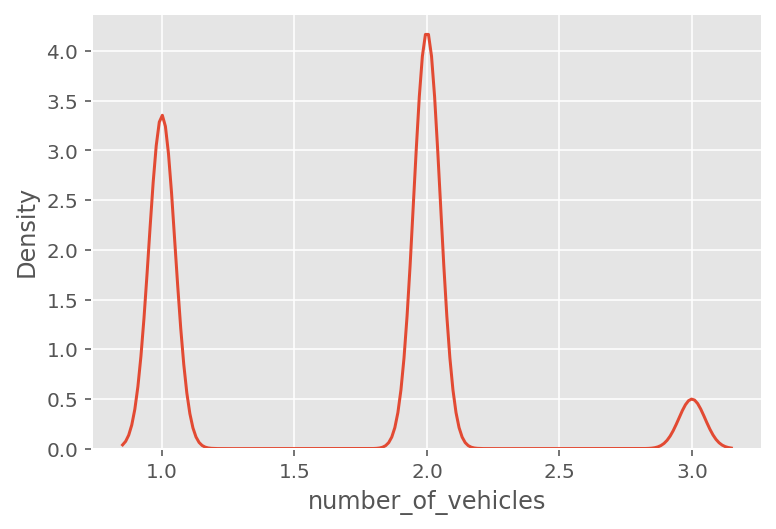

In [65]:
plt.boxplot(df_med_imp.number_of_vehicles)   #In this section we plotted again to see how our plots have changed after the replacement of outliers.It can be concluded that the
plt.show()                                  #replacement of outliers led to a better density diagram as shown and a box plot with no outliers.
sns.kdeplot(df_med_imp.number_of_vehicles)
plt.show()

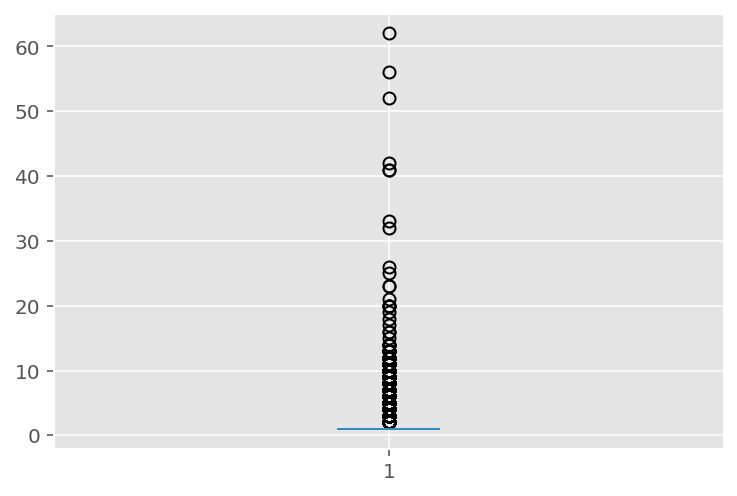

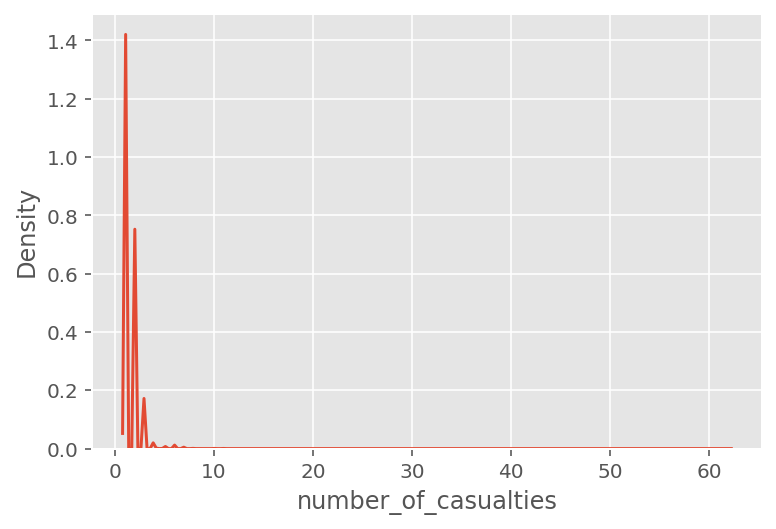

In [66]:
plt.boxplot(df_new.number_of_casualties)      #In this part of the code we are observing outliers using boxplot and by observing the distribution of data using density plot.We only chose the 
plt.show()                                    #columns which contained the data as int or float as object data types we can not find outliers for them.
sns.kdeplot(df_new.number_of_casualties)       #As shown in the next bar plot the column number of casualties contains many outliers.In addition,the distribution is not well formed.
plt.show()

In [67]:
#Using IQR method                                        #Here we used the IQR method by getting the 1st and the 3rd quantiles.The difference between the 75th and 25th percentiles of the data.
Q1_casualties = df_new.number_of_casualties.quantile(0.25)
Q3_casualties = df_new.number_of_casualties.quantile(0.75)
IQR_casualties = Q3_casualties - Q1_casualties
print(IQR_casualties)

0.0


In [68]:
Lower_Limit_casualties=Q1_casualties - 1.5 * IQR_casualties               #In this part we are getting the lower and upper limits. #we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. 
Upper_Limit_casualties=Q3_casualties + 1.5 * IQR_casualties               #This gives us the minimum and maximum fence posts that we compare each observation to. 
print(Lower_Limit_casualties)
print(Upper_Limit_casualties)

1.0
1.0


In [69]:
Upper_casualties=df_new[df_new['number_of_casualties'] > Upper_Limit_casualties]      #Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
Lower_casualties=df_new[df_new['number_of_casualties'] < Lower_Limit_casualties]      #Finally the total number of outliers has been calculated.
print('Total number of outliers are:',Upper_casualties.shape[0]+Lower_casualties.shape[0])

Total number of outliers are: 50144


In [70]:
cutoff_casualties = df_new.number_of_casualties.mean() + df_new.number_of_casualties.std() * 3      #Here we used the mean median imputation technique to clean outliers.We used..
cutoff_casualties

3.7503309922898067

In [71]:
median_casualties = df_new.number_of_casualties.median()                             #In this part a new copy of the dataset is created and the number of casualties outliers were replaced by median.
cutoff_casualties = df_new.number_of_casualties.mean() + df_new.number_of_casualties.std() * 3
df_med_imp["number_of_casualties"] = np.where(df_med_imp["number_of_casualties"]>cutoff_casualties, median_casualties, df_med_imp['number_of_casualties'] )

In [72]:
df_new.describe()         #Here we were trying to see the mean and std before removing outliers.

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit
count,247363.0,247363.000000,247363.000000,247363.000000,247363.000000,247363.000000
mean,1981.0,383286.548514,343152.925700,1.682762,1.308906,38.180848
std,0.0,127759.808473,214676.217924,0.705611,0.813808,13.505324
min,1981.0,1170.000000,500.000000,1.000000,1.000000,0.000000
25%,1981.0,324025.000000,176500.000000,1.000000,1.000000,30.000000
50%,1981.0,394940.000000,309000.000000,2.000000,1.000000,30.000000
75%,1981.0,458950.000000,431720.000000,2.000000,1.000000,40.000000
max,1981.0,998900.000000,999900.000000,56.000000,62.000000,70.000000


In [73]:
df_med_imp.describe()         #After the replacement of outliers the mean changed and std changed to better values.

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit
count,247363.0,247363.000000,247363.000000,247363.000000,247363.00000,247363.000000
mean,1981.0,383286.548514,343152.925700,1.645096,1.21373,38.180848
std,0.0,127759.808473,214676.217924,0.593962,0.48990,13.505324
min,1981.0,1170.000000,500.000000,1.000000,1.00000,0.000000
25%,1981.0,324025.000000,176500.000000,1.000000,1.00000,30.000000
50%,1981.0,394940.000000,309000.000000,2.000000,1.00000,30.000000
75%,1981.0,458950.000000,431720.000000,2.000000,1.00000,40.000000
max,1981.0,998900.000000,999900.000000,3.000000,3.00000,70.000000


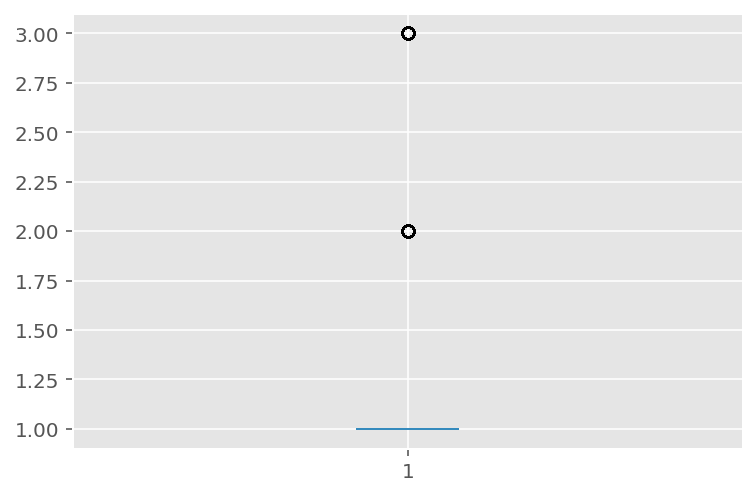

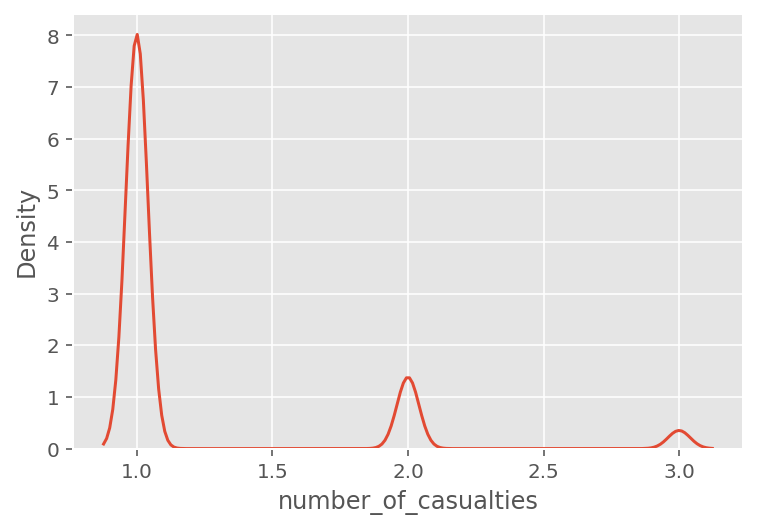

In [74]:
plt.boxplot(df_med_imp.number_of_casualties)         #In this section we plotted again to see how our plots have changed after the replacement of outliers.It can be concluded that the
plt.show()                                            #replacement of outliers led to a better density diagram as shown and a box plot with minimal outliers
sns.kdeplot(df_med_imp.number_of_casualties)
plt.show()

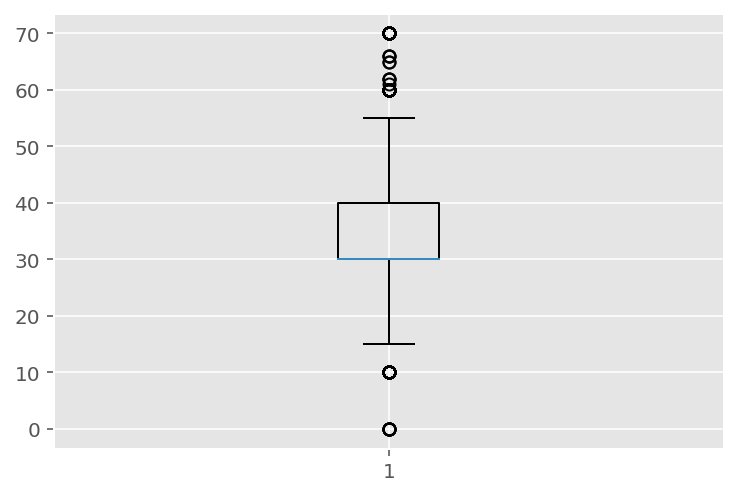

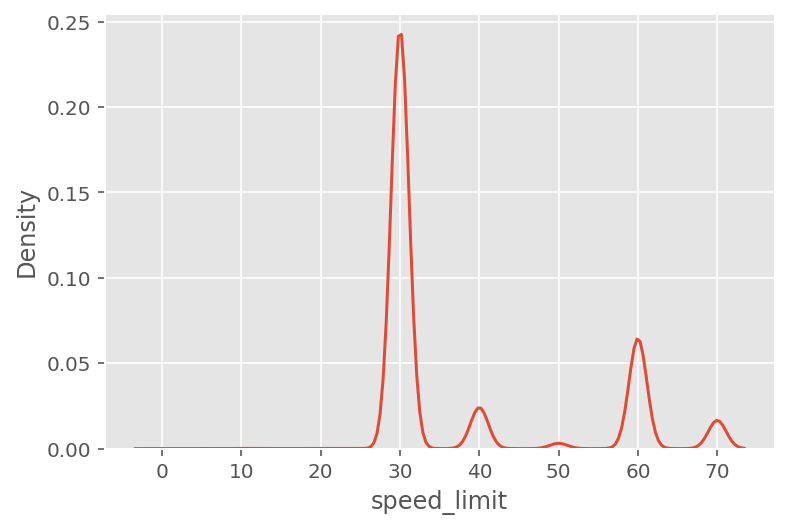

In [75]:
plt.boxplot(df_new.speed_limit)
plt.show()
sns.kdeplot(df_new.speed_limit)
plt.show()

In [76]:
#Using IQR method
Q1_speed = df_new.speed_limit.quantile(0.25)
Q3_speed = df_new.speed_limit.quantile(0.75)
IQR_speed = Q3_speed - Q1_speed
print(IQR_speed)

10.0


In [77]:
Lower_Limit_speed=Q1_speed - 1.5 * IQR_speed
Upper_Limit_speed=Q3_speed + 1.5 * IQR_speed
print(Lower_Limit_speed)
print(Upper_Limit_speed)

15.0
55.0


In [78]:
Upper_speed=df_new[df_new['speed_limit'] > Upper_Limit_speed]
Lower_speed=df_new[df_new['speed_limit'] < Lower_Limit_speed]
print('Total number of outliers are:',Upper_speed.shape[0]+Lower_speed.shape[0])

Total number of outliers are: 56744


In [79]:
cutoff_speed = df_new.speed_limit.mean() + df_new.speed_limit.std() * 3
cutoff_speed

78.69681844848031

In [80]:
median_speed = df_new.speed_limit.median()
cutoff_speed = df_new.speed_limit.mean() + df_new.speed_limit.std() * 3
df_med_imp["speed_limit"] = np.where(df_med_imp["speed_limit"]>cutoff_speed, median_speed, df_med_imp['speed_limit'] )

In [81]:
df_new.describe()

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit
count,247363.0,247363.000000,247363.000000,247363.000000,247363.000000,247363.000000
mean,1981.0,383286.548514,343152.925700,1.682762,1.308906,38.180848
std,0.0,127759.808473,214676.217924,0.705611,0.813808,13.505324
min,1981.0,1170.000000,500.000000,1.000000,1.000000,0.000000
25%,1981.0,324025.000000,176500.000000,1.000000,1.000000,30.000000
50%,1981.0,394940.000000,309000.000000,2.000000,1.000000,30.000000
75%,1981.0,458950.000000,431720.000000,2.000000,1.000000,40.000000
max,1981.0,998900.000000,999900.000000,56.000000,62.000000,70.000000


In [82]:
df_med_imp.describe()

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit
count,247363.0,247363.000000,247363.000000,247363.000000,247363.00000,247363.000000
mean,1981.0,383286.548514,343152.925700,1.645096,1.21373,38.180848
std,0.0,127759.808473,214676.217924,0.593962,0.48990,13.505324
min,1981.0,1170.000000,500.000000,1.000000,1.00000,0.000000
25%,1981.0,324025.000000,176500.000000,1.000000,1.00000,30.000000
50%,1981.0,394940.000000,309000.000000,2.000000,1.00000,30.000000
75%,1981.0,458950.000000,431720.000000,2.000000,1.00000,40.000000
max,1981.0,998900.000000,999900.000000,3.000000,3.00000,70.000000


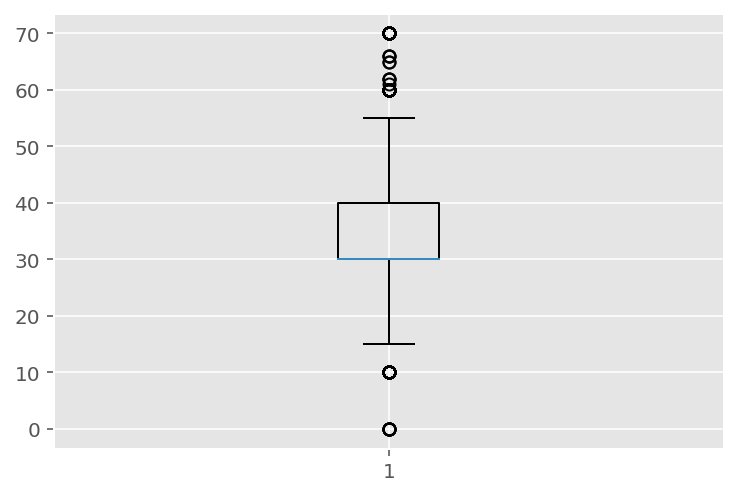

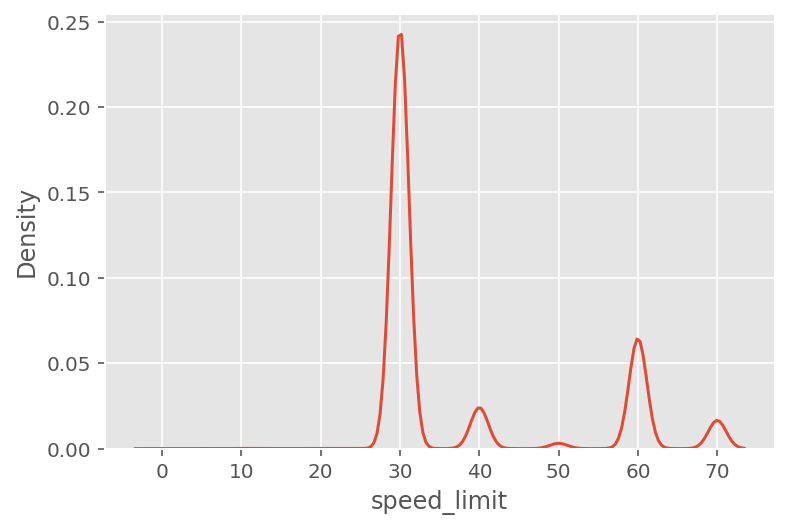

In [83]:
plt.boxplot(df_med_imp.speed_limit)
plt.show()
sns.kdeplot(df_med_imp.speed_limit)
plt.show()

In [84]:
floor_speed=df_new['speed_limit'].quantile(0.10)        #Here we used the flooring and capping method as the mean/median impuation method couldn't solve the outliers problem.
cap_speed=df_new['speed_limit'].quantile(0.90)          #the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
floor_speed,cap_speed

(30.0, 60.0)

In [85]:
df_med_imp["speed_limit"]=np.where(df_med_imp["speed_limit"] < floor_speed, floor_speed, df_med_imp["speed_limit"])   #replacing the speed limit with the floor ad the cap.
df_med_imp["speed_limit"]=np.where(df_med_imp["speed_limit"] > cap_speed, cap_speed, df_med_imp["speed_limit"])

In [86]:
df_med_imp.describe()

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit
count,247363.0,247363.000000,247363.000000,247363.000000,247363.00000,247363.000000
mean,1981.0,383286.548514,343152.925700,1.645096,1.21373,37.725242
std,0.0,127759.808473,214676.217924,0.593962,0.48990,12.519663
min,1981.0,1170.000000,500.000000,1.000000,1.00000,30.000000
25%,1981.0,324025.000000,176500.000000,1.000000,1.00000,30.000000
50%,1981.0,394940.000000,309000.000000,2.000000,1.00000,30.000000
75%,1981.0,458950.000000,431720.000000,2.000000,1.00000,40.000000
max,1981.0,998900.000000,999900.000000,3.000000,3.00000,60.000000


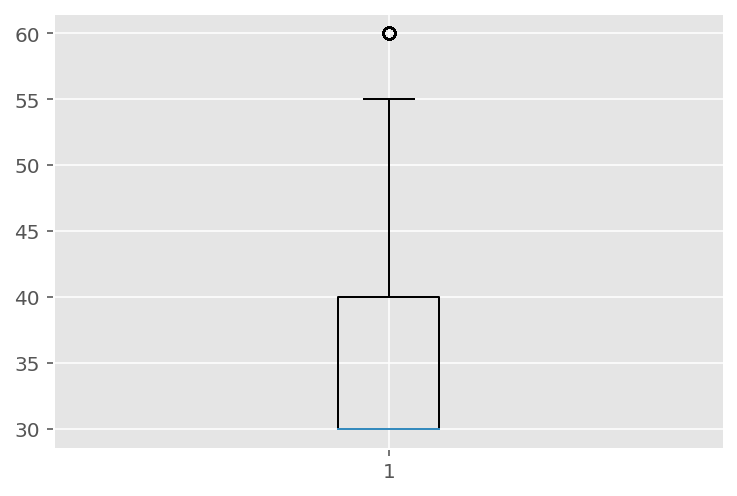

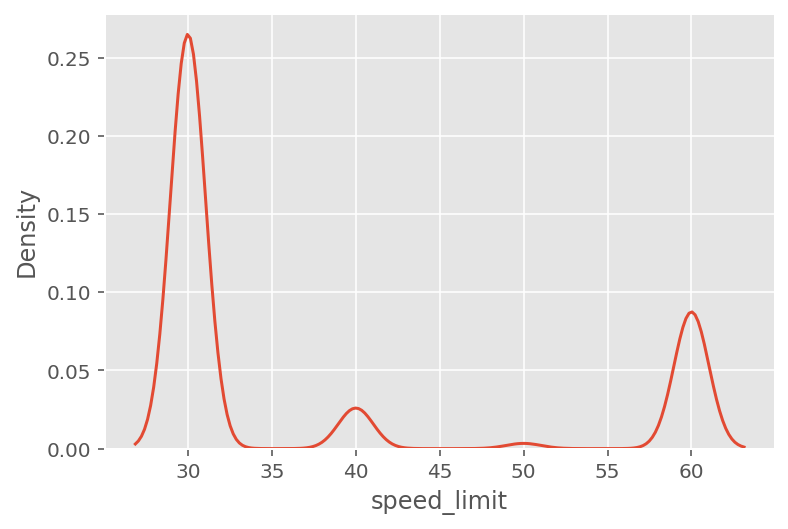

In [87]:
plt.boxplot(df_med_imp.speed_limit)
plt.show()
sns.kdeplot(df_med_imp.speed_limit)
plt.show()

In [88]:
# Z score      #Here we are using diffrent method to detect outliers the z score method
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_new['speed_limit']))
print(z)


0         0.605751
1         0.134699
2         0.605751
3         0.605751
4         0.605751
            ...   
248271    2.356050
248272    0.605751
248273    1.615600
248274    1.615600
248275    0.605751
Name: speed_limit, Length: 247363, dtype: float64


In [89]:
filtered_entries= z<3    #In this part we are seeing all the entries that contain values less than 3 these are outliers.
filtered_entries

0         True
1         True
2         True
3         True
4         True
          ... 
248271    True
248272    True
248273    True
248274    True
248275    True
Name: speed_limit, Length: 247363, dtype: bool

In [90]:
df_zscore_filter=df_new[filtered_entries]
print(df_zscore_filter.shape)

(247363, 28)


# 4 - Data transformation

## 4.1 - Discretization

In [91]:
df_med_imp['date']=pd.to_datetime(df_med_imp['date']) #converting date datatype to datetime datatype


In [92]:
df_med_imp['week_number'] = df_med_imp['date'].dt.isocalendar().week  #adding week_number column with date pinned properly with correct labels
print(df_med_imp['week_number'])

0          1
1          1
2          1
3          1
4          1
          ..
248271    52
248272    46
248273    52
248274    52
248275    15
Name: week_number, Length: 247363, dtype: UInt32


## 4.2 - Encoding

In [93]:
print(df_med_imp)

       accident_index  accident_year accident_reference  \
0       198101A1AJF60           1981          01A1AJF60   
1       198101A1AKF27           1981          01A1AKF27   
2       198101A1ALK52           1981          01A1ALK52   
3       198101A1BBE59           1981          01A1BBE59   
4       198101A1BCC73           1981          01A1BCC73   
...               ...            ...                ...   
248271  1981981771643           1981          981771643   
248272  1981981772644           1981          981772644   
248273  1981981773645           1981          981773645   
248274  1981981774646           1981          981774646   
248275  198198T760257           1981          98T760257   

        location_easting_osgr  location_northing_osgr           police_force  \
0                    409490.0                430000.0    Metropolitan Police   
1                    343790.0                747000.0    Metropolitan Police   
2                     92370.0                202000

In [94]:
#FREQUENCY ENCODING 
#def freqEncoding(df,z):
#    df_FreqEncoding=df_med_imp.copy()
#   for i in range (len(z)):
 #       enc=(df_med_imp.groupby(df_med_imp[z[i]]).size()) / len(df_med_imp)
  #      df_FreqEncoding[z[i]] = df_med_imp[z[i]].apply(lambda x : enc[x])
   # return df_FreqEncoding

In [95]:
#z=["accident_severity","number_of_vehicles","number_of_casualties","local_authority_district"] #choosing the proper catogerical features for the Frequency Encoding Method 
#df_FreqEncoding=freqEncoding(df,z) #encoding the above features using frequency encoding we encoded the values which had less than 3 different categories
#df_FreqEncoding.to_csv('encoded.csv', mode='a') #lookup table
#df_FreqEncoding.head()



In [96]:
#LABEL ENCODING

def labelEncoding(df,x):
    df_LabelEncoding = df_med_imp.copy() 
    for i in range(len(x)):
            df_LabelEncoding[x[i]] = preprocessing.LabelEncoder().fit_transform(df_med_imp[x[i]])
    return df_LabelEncoding

In [97]:
x=["date","time","location_easting_osgr","location_northing_osgr","police_force","day_of_week","first_road_class","first_road_number","road_type","speed_limit","junction_detail","junction_control","second_road_class","second_road_number","pedestrian_crossing_physical_facilities","pedestrian_crossing_human_control","weather_conditions","special_conditions_at_site","carriageway_hazards","week_number","day_of_week","light_conditions","road_surface_conditions","accident_severity","number_of_vehicles","number_of_casualties"] #choosing the proper catogerical features for the Label Encoding Method 
df_LabelEncoding=labelEncoding(df,x) #encoding the above features using label encoding
df_LabelEncoding.to_csv('encoded.csv', mode='a') #lookup table
df_LabelEncoding.head() #All remaining columns are encoded using label encoding.
#We will not encode the year of accident,date,time,and accident reference as encoding happens on categorical data.

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number
0,198101A1AJF60,1981,01A1AJF60,21789,28854,29,2,2,0,0,4,45,Epping Forest,0,227,4,0,8,2,5,2686,4,4,1,3,0,1,1,0
1,198101A1AKF27,1981,01A1AKF27,15524,40804,29,2,1,0,0,4,50,Enfield,0,1,0,8,0,1,5,2686,0,0,1,3,0,1,1,0
2,198101A1ALK52,1981,01A1ALK52,1881,12156,29,2,2,0,0,4,55,Hounslow,2,1248,4,0,3,3,5,2686,4,4,1,5,4,1,1,0
3,198101A1BBE59,1981,01A1BBE59,2770,32548,29,2,2,1,0,4,65,Hounslow,0,1414,4,0,8,2,5,2686,4,4,1,3,4,1,1,0
4,198101A1BCC73,1981,01A1BCC73,17866,9769,29,2,0,0,0,4,70,Lewisham,0,748,3,0,3,3,5,2686,3,3,1,3,4,1,1,0


## 4.3 - Normalisation 

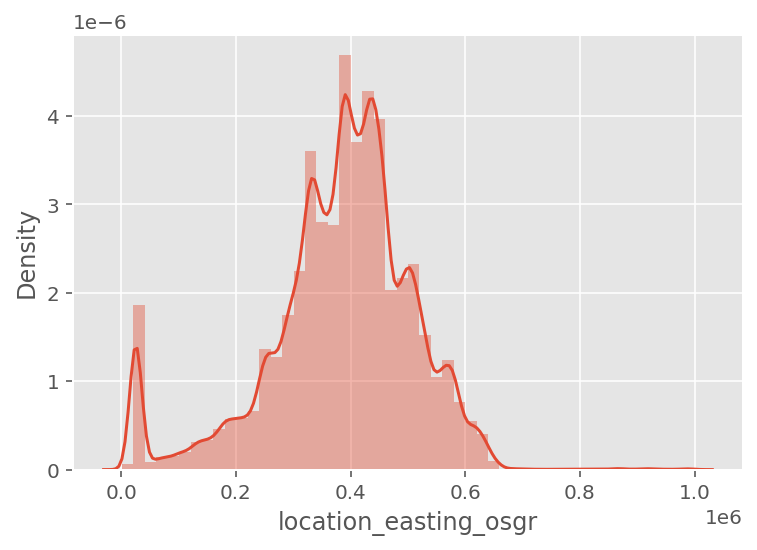

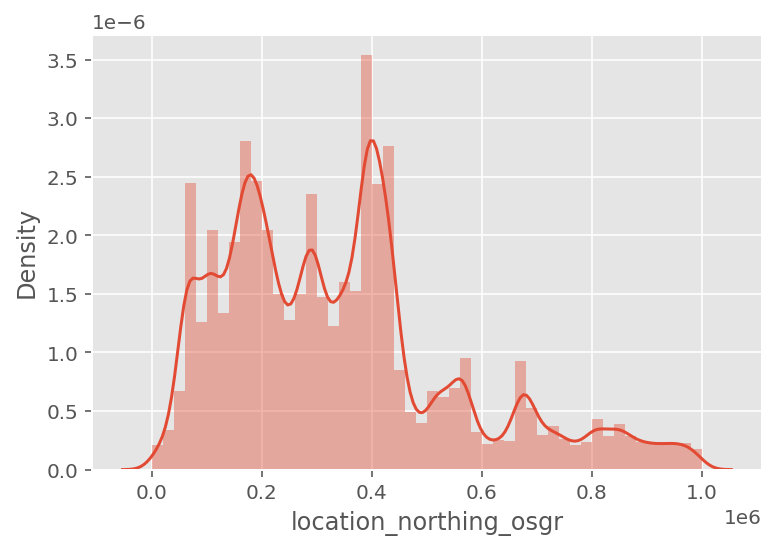

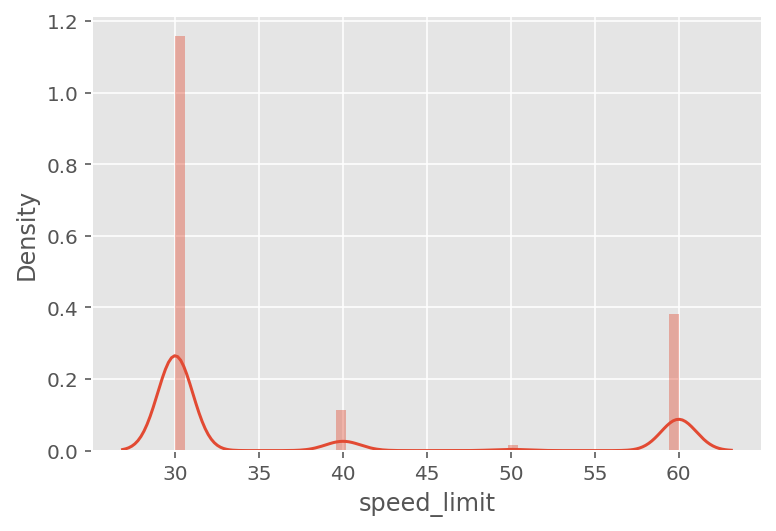

<Figure size 432x288 with 0 Axes>

In [98]:
sns.distplot(df_med_imp['location_easting_osgr']);
fig = plt.figure()
sns.distplot(df_med_imp['location_northing_osgr']);
fig = plt.figure()
sns.distplot(df_med_imp['speed_limit']);
fig = plt.figure()


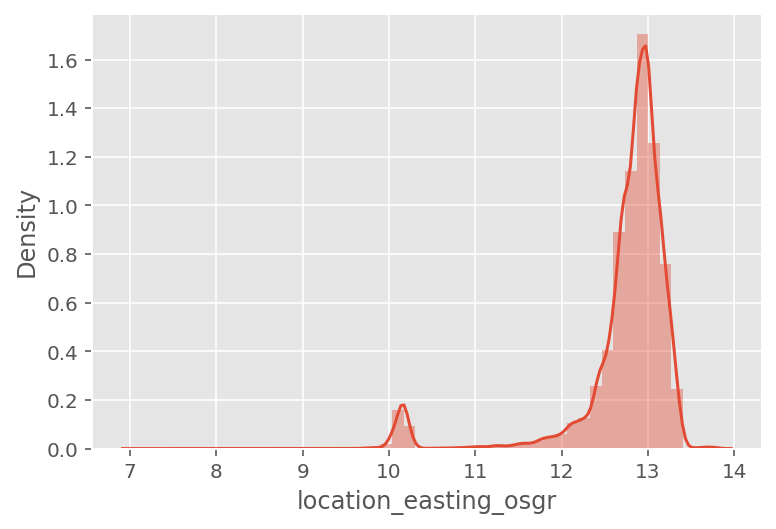

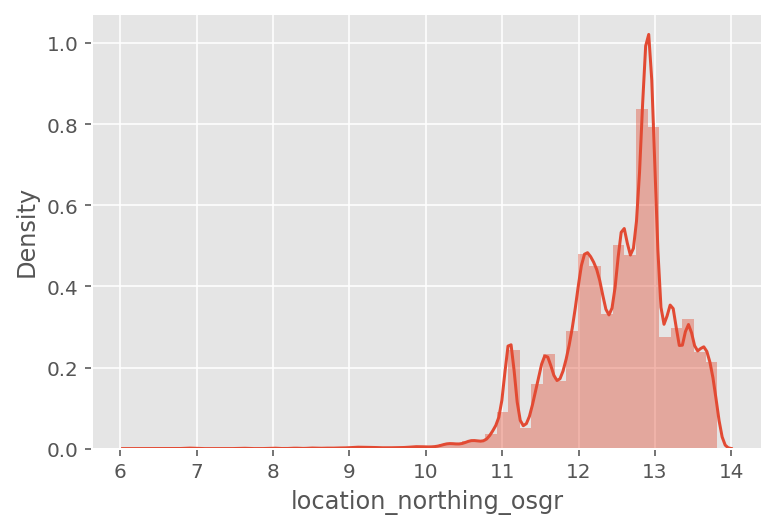

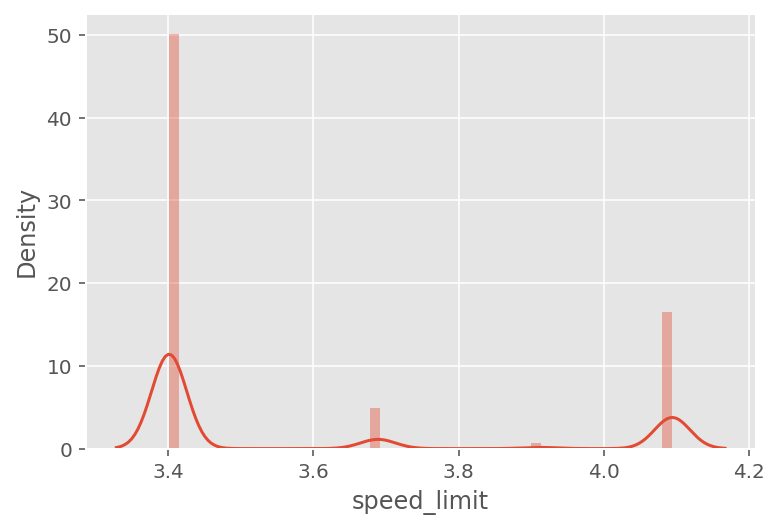

<Figure size 432x288 with 0 Axes>

In [99]:
df_med_imp['location_easting_osgr'] = np.log(df_med_imp['location_easting_osgr'])
df_med_imp['location_northing_osgr'] = np.log(df_med_imp['location_northing_osgr'])
df_med_imp['speed_limit'] = np.log(df_med_imp['speed_limit'])
sns.distplot(df_med_imp['location_easting_osgr']);
fig = plt.figure()
sns.distplot(df_med_imp['location_northing_osgr']);
fig = plt.figure()
sns.distplot(df_med_imp['speed_limit']);
fig = plt.figure()

In [100]:
df_med_imp['location_easting_osgr'] = stats.boxcox(df_med_imp['location_easting_osgr'])[0]
df_med_imp['location_northing_osgr'] = stats.boxcox(df_med_imp['location_northing_osgr'])[0]
df_med_imp['number_of_casualties'] = stats.boxcox(df_med_imp['number_of_casualties'])[0]
df_med_imp['number_of_vehicles'] = stats.boxcox(df_med_imp['number_of_vehicles'])[0]
df_med_imp['speed_limit'] = stats.boxcox(df_med_imp['speed_limit'])[0]

## 4.31 - Findings and conclusions

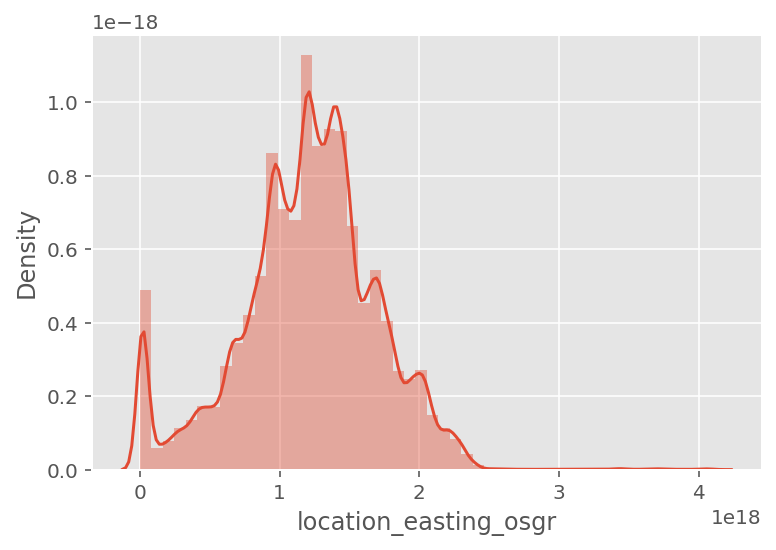

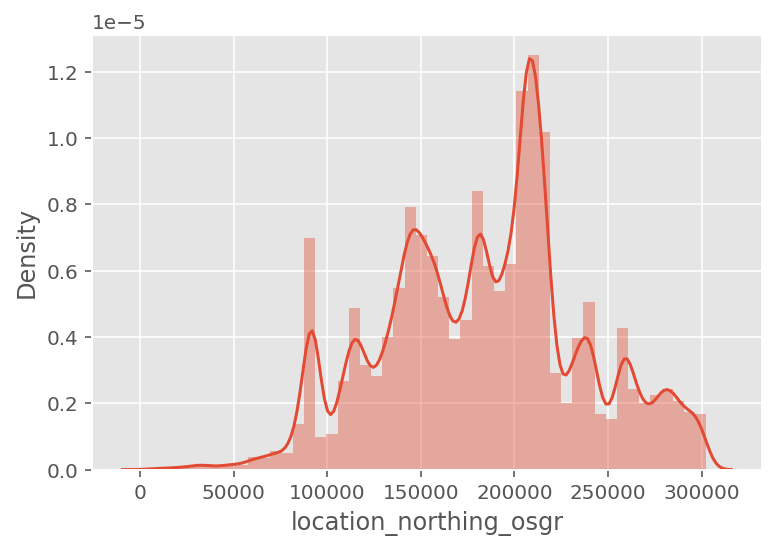

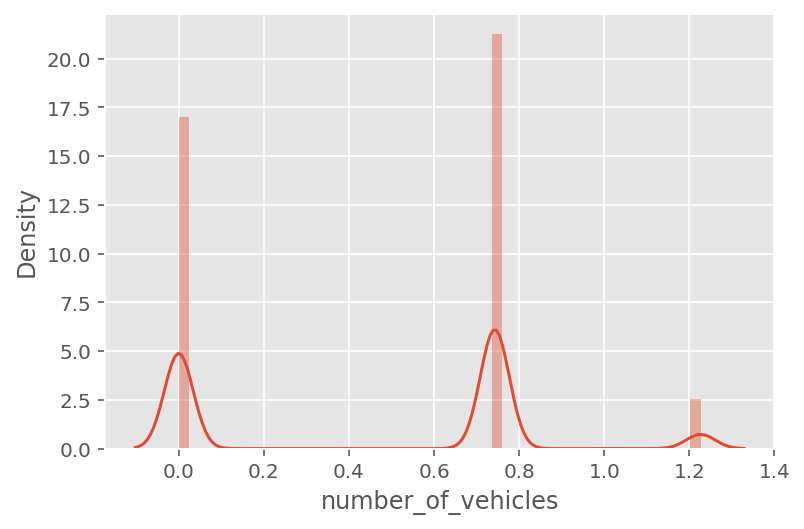

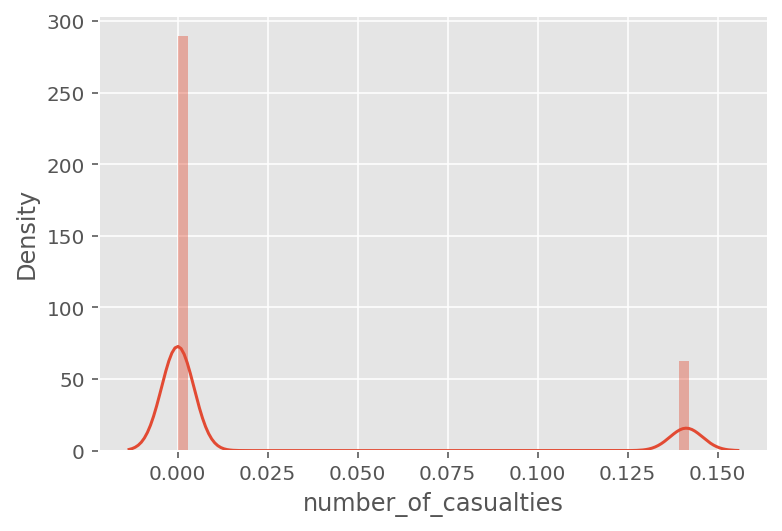

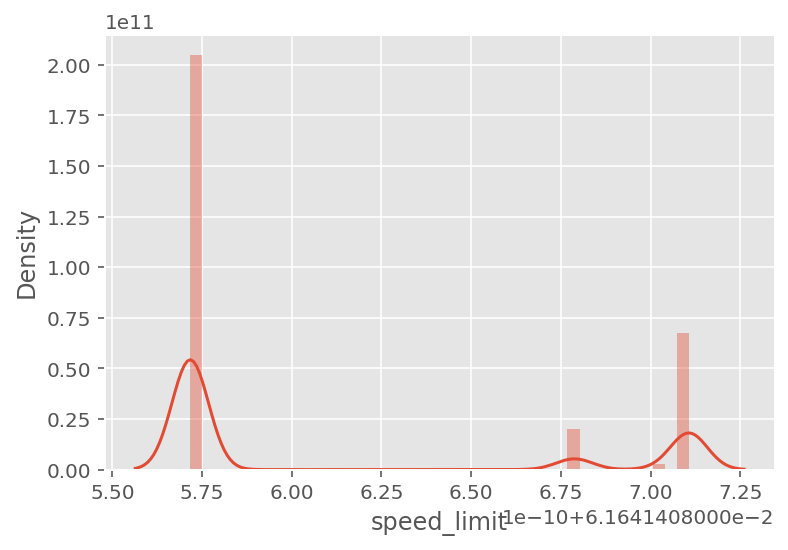

<Figure size 432x288 with 0 Axes>

In [101]:
#plotting the distribution of those columns after normalization
sns.distplot(df_med_imp['location_easting_osgr']);
fig = plt.figure()
sns.distplot(df_med_imp['location_northing_osgr']);
fig = plt.figure()
sns.distplot(df_med_imp['number_of_vehicles']);
fig = plt.figure()
sns.distplot(df_med_imp['number_of_casualties']);
fig = plt.figure()
sns.distplot(df_med_imp['speed_limit']);
fig = plt.figure()

## 4.4 - Adding more columns

In [102]:
#Adding_Weekend_Column
df_weekend=df_med_imp.copy()
df_weekend['weekend']=(df_weekend['day_of_week']==("Saturday" or "Sunday"))



In [103]:
df_season=df_weekend.copy()
df_season['season']=(df_season['date']==('Summer' or 'Winter' or 'Autumn' or 'Spring'))
df_season


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,week_number,weekend,season
0,198101A1AJF60,1981,01A1AJF60,1.286000e+18,214570.927237,Metropolitan Police,Slight,1.226576,0.000000,1981-01-01,Thursday,00:45,Epping Forest,A,121.0,missing,0.061641,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Dry,None,None,1,False,False
1,198101A1AKF27,1981,01A1AKF27,1.014405e+18,269337.363947,Metropolitan Police,Slight,0.742708,0.000000,1981-01-01,Thursday,00:50,Enfield,A,10.0,Dual carriageway,0.061641,Crossroads,Auto traffic signal,None within 50 metres,None within 50 metres,Dual carriageway,Dual carriageway,Darkness - lights lit,Other,Dry,None,None,1,False,False
2,198101A1ALK52,1981,01A1ALK52,1.525700e+17,154696.260701,Metropolitan Police,Slight,1.226576,0.000000,1981-01-01,Thursday,00:55,Hounslow,B,377.0,missing,0.061641,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,1,False,False
3,198101A1BBE59,1981,01A1BBE59,2.526657e+17,226425.705317,Metropolitan Police,Slight,1.226576,0.141045,1981-01-01,Thursday,01:05,Hounslow,A,4127.0,missing,0.061641,T or staggered junction,Give way or uncontrolled,None within 50 metres,None within 50 metres,missing,missing,Darkness - lights lit,Other,Wet or damp,None,None,1,False,False
4,198101A1BCC73,1981,01A1BCC73,1.114046e+18,144294.179859,Metropolitan Police,Slight,0.000000,0.000000,1981-01-01,Thursday,01:10,Lewisham,A,2218.0,Single carriageway,0.061641,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Single carriageway,Single carriageway,Darkness - lights lit,Other,Wet or damp,None,None,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248271,1981981771643,1981,981771643,8.731904e+17,246839.113039,Dumfries and Galloway,Slight,0.000000,0.000000,1981-12-24,Thursday,01:30,859,A,74.0,Dual carriageway,0.061641,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Dual carriageway,Dual carriageway,Darkness - no lighting,Fine no high winds,Wet or damp,Other object on road,Other object on road,52,False,False
248272,1981981772644,1981,981772644,6.445298e+17,237101.879813,Dumfries and Galloway,Serious,0.742708,0.000000,1981-11-12,Friday,23:10,856,B,7004.0,Single carriageway,0.061641,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,Single carriageway,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,46,False,False
248273,1981981773645,1981,981773645,6.086175e+17,238952.325021,Dumfries and Galloway,Slight,0.000000,0.141045,1981-12-25,Friday,15:30,856,B,733.0,Single carriageway,0.061641,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,None within 50 metres,Single carriageway,Single carriageway,Daylight,Fine no high winds,Dry,None,None,52,False,False
248274,1981981774646,1981,981774646,5.216100e+17,239182.014216,Dumfries and Galloway,Serious,0.742708,0.000000,1981-12-21,Monday,18:30,856,A,75.0,Single carriageway,0.061641,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,Single carriageway,Darkness - no lig

## 4.41 - Findings and concluisons

<AxesSubplot:xlabel='weekend', ylabel='count'>

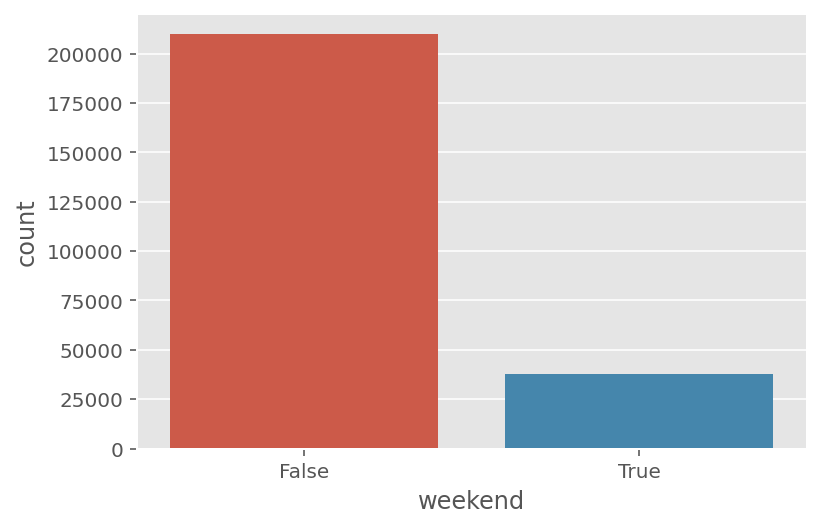

In [104]:
sns.countplot('weekend',data=df_weekend)

## 5- KNN, logistic regression, naive baise and neural network without diagnostics techniques


In [105]:
!pip install tensorflow

In [106]:
df_LabelEncoding.to_csv('df_final.csv')



In [111]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import label_binarize

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [112]:
# Assuming you have a DataFrame called 'df' containing your dataset
columns_to_drop = ['accident_index', 'accident_reference','local_authority_district']
X = df_LabelEncoding.drop(columns_to_drop, axis=1)
y = df_LabelEncoding['accident_severity']

In [227]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
# Initialize classifiers
lr = LogisticRegression(multi_class='multinomial', class_weight='balanced')
nn = MLPClassifier()
nb = MultinomialNB()
k=3
knn = KNeighborsClassifier(n_neighbors=k)

In [230]:
# Train classifiers
lr.fit(X_train, y_train)
nn.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [231]:
# Make predictions on test set
lr_pred = lr.predict(X_test)
nn_pred = nn.predict(X_test)
nb_pred = nb.predict(X_test)
knn_pred = knn.predict(X_test)

In [232]:
# Evaluate performance
accuracy = {
    'Naive Bayes': accuracy_score(y_test, nb_pred),
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'Neural Networks': accuracy_score(y_test, nn_pred),
    'KNN': accuracy_score(y_test, knn_pred)
}

In [233]:
precision = {
    'Naive Bayes': precision_score(y_test, nb_pred, average='weighted'),
    'Logistic Regression': precision_score(y_test, lr_pred, average='weighted'),
    'Neural Networks': precision_score(y_test, nn_pred, average='weighted'),
    'KNN': precision_score(y_test, knn_pred, average='weighted')
}



In [234]:
recall = {
    'Naive Bayes': recall_score(y_test, nb_pred, average='weighted'),
    'Logistic Regression': recall_score(y_test, lr_pred, average='weighted'),
    'Neural Networks': recall_score(y_test, nn_pred, average='weighted'),
    'KNN': recall_score(y_test, knn_pred, average='weighted')
    
}


In [235]:
f1 = {
    'Naive Bayes': f1_score(y_test, nb_pred, average='weighted'),
    'Logistic Regression': f1_score(y_test, lr_pred, average='weighted'),
    'Neural Networks': f1_score(y_test, nn_pred, average='weighted'),
    'KNN': f1_score(y_test, knn_pred, average='weighted')
}


In [187]:
# Print performance metrics
print("Accuracy:")
for clf, acc in accuracy.items():
    print(f"{clf}: {acc:.4f}")


Accuracy:
Naive Bayes: 0.4886
Logistic Regression: 0.3435
Neural Networks: 0.9970


In [188]:
print("\nPrecision:")
for clf, prec in precision.items():
    print(f"{clf}: {prec:.4f}")


Precision:
Naive Bayes: 0.6192
Logistic Regression: 0.6058
Neural Networks: 0.9970


In [189]:
print("\nRecall:")
for clf, rec in recall.items():
    print(f"{clf}: {rec:.4f}")


Recall:
Naive Bayes: 0.4886
Logistic Regression: 0.3435
Neural Networks: 0.9970


In [190]:
print("\nF1-score:")
for clf, f1score in f1.items():
    print(f"{clf}: {f1score:.4f}")



F1-score:
Naive Bayes: 0.5178
Logistic Regression: 0.4178
Neural Networks: 0.9970


#Applying diagnositic techniques on all models 

# LogisticRegression

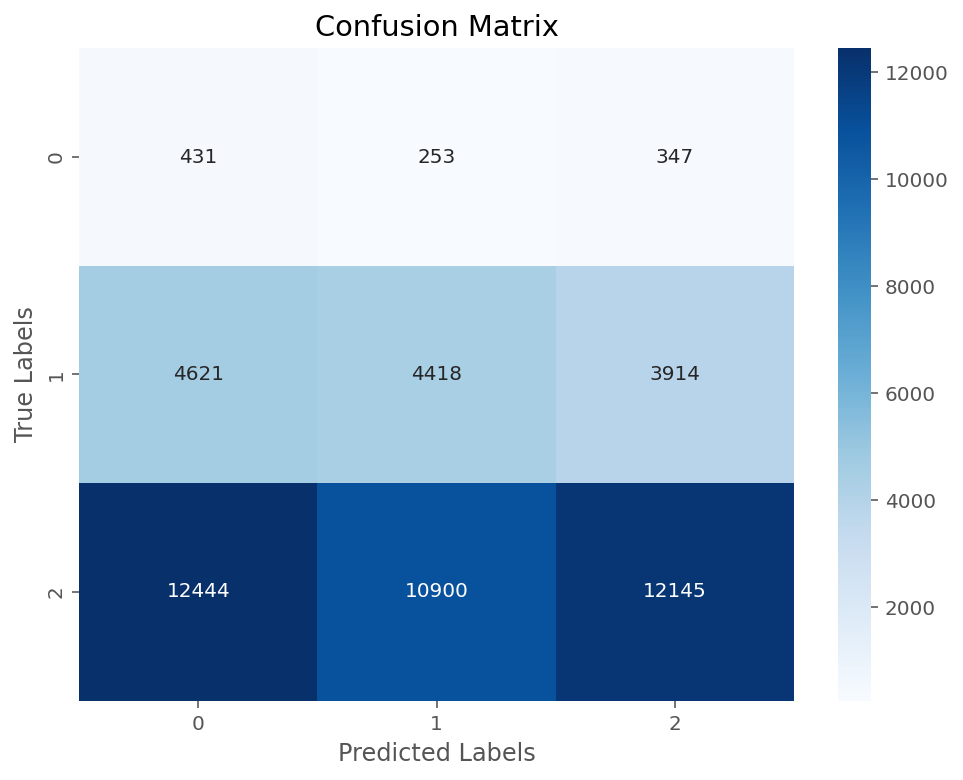

In [156]:
# Preprocess your data and split it into features (X) and the target column (y)
# Create the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [170]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Define the number of folds for k-fold cross-validation
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the classification report for each fold
classification_reports = []

# Iterate over the k folds
fold = 1
for train_index, test_index in kf.split(X,y):
    print(f"Fold: {fold}")
    fold += 1
    
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the logistic regression model
    model = LogisticRegression(multi_class='multinomial', class_weight='balanced')
    model.fit(X_train, y_train)
    
    # Make predictions on the test set for the current fold
    y_pred = model.predict(X_test)
    
    # Generate and store the classification report for the current fold
    report = classification_report(y_test, y_pred)
    classification_reports.append(report)

# Print the classification report for each fold
for i, report in enumerate(classification_reports):
    print(f"Fold {i+1}:\n{report}")

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold 1:
              precision    recall  f1-score   support

           0       0.02      0.42      0.05      1031
           1       0.28      0.34      0.31     12953
           2       0.74      0.34      0.47     35489

    accuracy                           0.34     49473
   macro avg       0.35      0.37      0.27     49473
weighted avg       0.61      0.34      0.42     49473

Fold 2:
              precision    recall  f1-score   support

           0       0.03      0.44      0.05      1073
           1       0.29      0.35      0.31     13044
           2       0.74      0.33      0.46     35356

    accuracy                           0.34     49473
   macro avg       0.35      0.38      0.28     49473
weighted avg       0.61      0.34      0.41     49473

Fold 3:
              precision    recall  f1-score   support

           0       0.03      0.43      0.05      1099
           1       0.28      0.34      0.31     12653
           

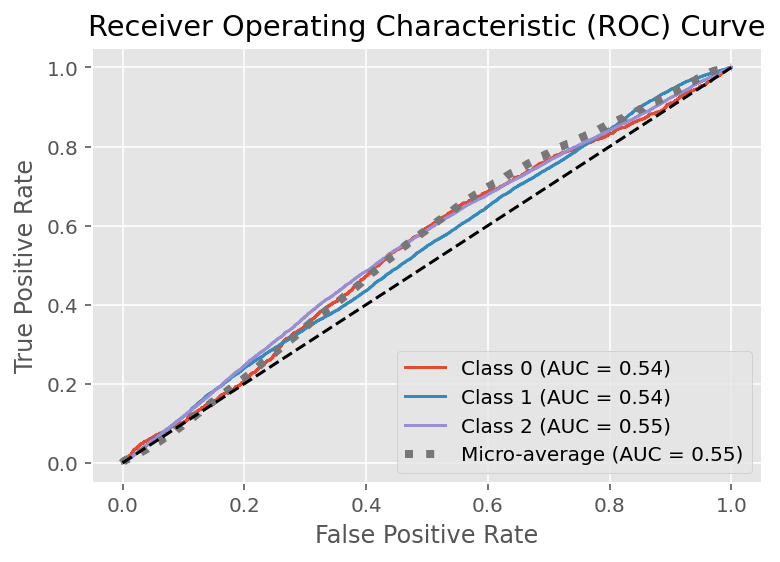

In [171]:

# Convert the target variable to binary format
y_test_binary = label_binarize(y_test, classes=np.unique(y))

# Obtain the predicted probabilities for the test set
y_scores = lr.predict_proba(X_test)

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curves for each class
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = %0.2f)' % roc_auc_micro, linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [174]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report


# Define the number of folds for k-fold cross-validation
k = 5

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the classification report for each fold
classification_reports = []

# Iterate over the k folds
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold: {fold}")
    fold += 1
    
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the logistic regression model
    model = LogisticRegression(multi_class='multinomial', class_weight='balanced')
    model.fit(X_train, y_train)
    
    # Make predictions on the test set for the current fold
    y_pred = model.predict(X_test)
    
    # Generate and store the classification report for the current fold
    report = classification_report(y_test, y_pred)
    classification_reports.append(report)

# Print the classification report for each fold
for i, report in enumerate(classification_reports):
    print(f"Fold {i+1}:\n{report}")

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold 1:
              precision    recall  f1-score   support

           0       0.03      0.45      0.05      1067
           1       0.28      0.34      0.31     12962
           2       0.74      0.34      0.47     35444

    accuracy                           0.34     49473
   macro avg       0.35      0.38      0.28     49473
weighted avg       0.61      0.34      0.42     49473

Fold 2:
              precision    recall  f1-score   support

           0       0.03      0.42      0.05      1067
           1       0.29      0.35      0.31     12962
           2       0.75      0.35      0.48     35444

    accuracy                           0.35     49473
   macro avg       0.35      0.37      0.28     49473
weighted avg       0.61      0.35      0.42     49473

Fold 3:
              precision    recall  f1-score   support

           0       0.03      0.44      0.05      1067
           1       0.28      0.35      0.31     12962
           

In [175]:
# Split the preprocessed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model with regularization
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0, penalty='l2')

# Fit the logistic regression model to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7173407717340772


# NeuralNetworks

In [221]:


# Define your neural network architecture
z=3
lamda=0.001
model = Sequential()
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(lamda)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(lamda)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/5
19789/19789 [==============================] - 27s 1ms/step - loss: 11.7288 - accuracy: 0.6523
Epoch 2/5
19789/19789 [==============================] - 30s 2ms/step - loss: 0.6782 - accuracy: 0.7162
Epoch 3/5
19789/19789 [==============================] - 27s 1ms/step - loss: 0.6738 - accuracy: 0.7162
Epoch 4/5
19789/19789 [==============================] - 32s 2ms/step - loss: 0.6737 - accuracy: 0.7162
Epoch 5/5
1547/1547 [==============================] - 3s 1ms/step - loss: 0.6702 - accuracy: 0.7173


In [247]:


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert the numerical labels to one-hot encoded vectors
y_encoded = to_categorical(y)

# Define the number of folds for cross-validation
n_splits = 5

# Initialize the stratified k-fold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize empty lists to store accuracy scores for each fold
accuracy_scores = []

# Iterate over the folds
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create a neural network model
    model = Sequential()
    # Add layers to the model
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    y_pred = model.predict_classes(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy score across all folds
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy: {:.2f}".format(avg_accuracy))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [248]:


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_encoded = to_categorical(y)

# Define the number of folds for cross-validation
n_splits = 5

# Initialize the k-fold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize empty lists to store accuracy scores for each fold
accuracy_scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create a neural network model
    model = Sequential()
    # Add layers to the model
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    y_pred = model.predict_classes(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy score across all folds
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy: {:.2f}".format(avg_accuracy))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:


# Assuming you have already defined and compiled your neural network model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Make predictions on the test set
y_pred = model.predict(x_test).ravel()

# Compute the false positive rate (FPR), true positive rate (TPR), and area under the ROC curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [246]:


# Assuming you have already defined and compiled your neural network model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10)

# Make predictions on the test set
y_pred = model.predict_classes(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: Data cardinality is ambiguous:
  x sizes: 197890
  y sizes: 222627
Make sure all arrays contain the same number of samples.

# NaiveBayes

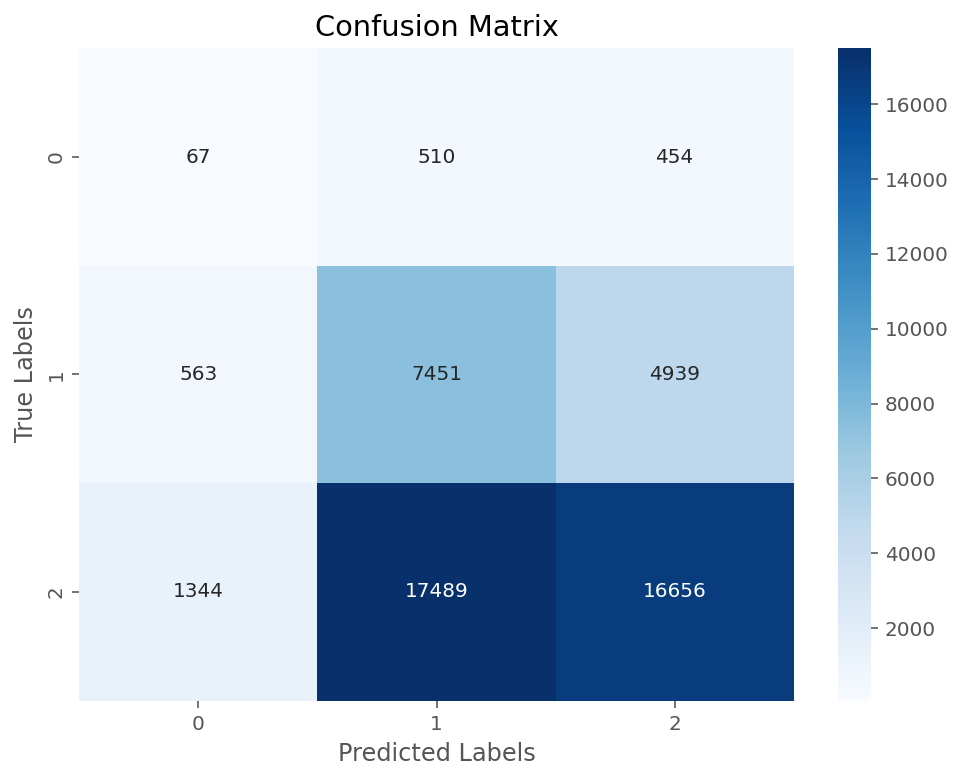

In [192]:
# Create the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [203]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report


# Define the number of folds for k-fold cross-validation
k = 5

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the classification report for each fold
classification_reports = []

# Iterate over the k folds
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold: {fold}")
    fold += 1
    
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set for the current fold
    y_pred = model.predict(X_test)
    
    # Generate and store the classification report for the current fold
    report = classification_report(y_test, y_pred)
    classification_reports.append(report)

# Print the classification report for each fold
for i, report in enumerate(classification_reports):
    print(f"Fold {i+1}:\n{report}")

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold 1:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      1067
           1       0.98      0.99      0.98     12962
           2       1.00      1.00      1.00     35444

    accuracy                           0.99     49473
   macro avg       0.99      0.91      0.94     49473
weighted avg       0.99      0.99      0.99     49473

Fold 2:
              precision    recall  f1-score   support

           0       0.97      0.76      0.86      1067
           1       0.98      0.99      0.98     12962
           2       1.00      1.00      1.00     35444

    accuracy                           0.99     49473
   macro avg       0.98      0.92      0.95     49473
weighted avg       0.99      0.99      0.99     49473

Fold 3:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1067
           1       0.98      0.98      0.98     12962
           

In [204]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Define the number of folds for stratified cross-validation
k = 5

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the classification report for each fold
classification_reports = []

# Iterate over the k folds
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold: {fold}")
    fold += 1
    
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set for the current fold
    y_pred = model.predict(X_test)
    
    # Generate and store the classification report for the current fold
    report = classification_report(y_test, y_pred)
    classification_reports.append(report)

# Print the classification report for each fold
for i, report in enumerate(classification_reports):
    print(f"Fold {i+1}:\n{report}")

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold 1:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      1067
           1       0.98      0.99      0.98     12962
           2       1.00      1.00      1.00     35444

    accuracy                           0.99     49473
   macro avg       0.99      0.91      0.94     49473
weighted avg       0.99      0.99      0.99     49473

Fold 2:
              precision    recall  f1-score   support

           0       0.97      0.76      0.86      1067
           1       0.98      0.99      0.98     12962
           2       1.00      1.00      1.00     35444

    accuracy                           0.99     49473
   macro avg       0.98      0.92      0.95     49473
weighted avg       0.99      0.99      0.99     49473

Fold 3:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1067
           1       0.98      0.98      0.98     12962
           

# KNN

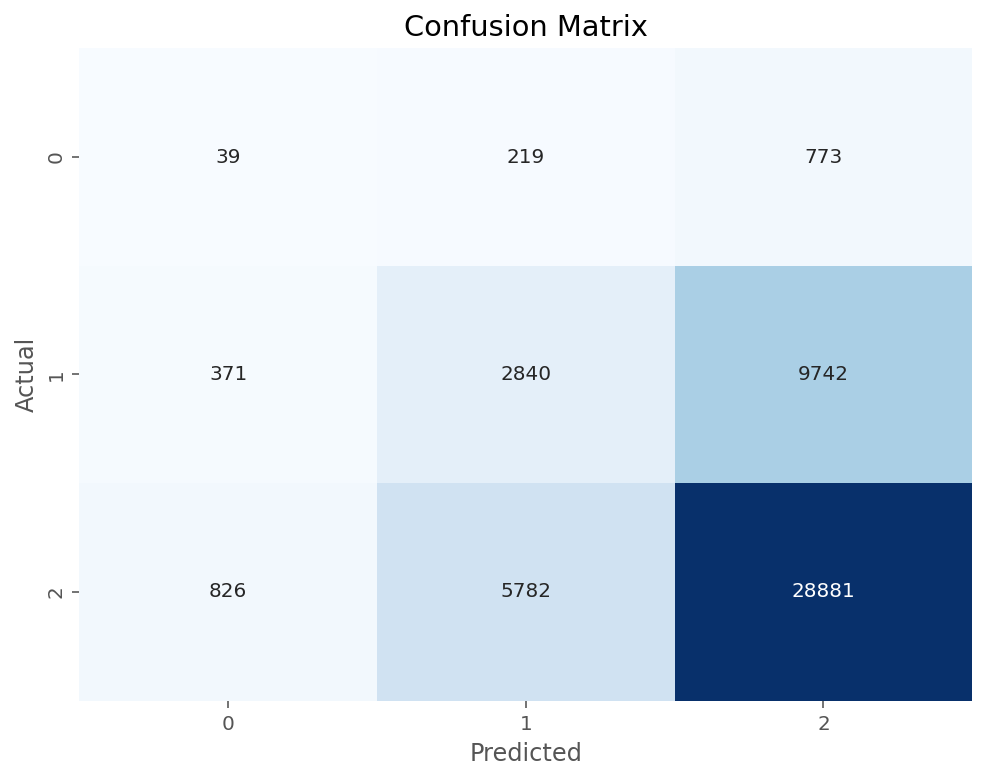

In [236]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

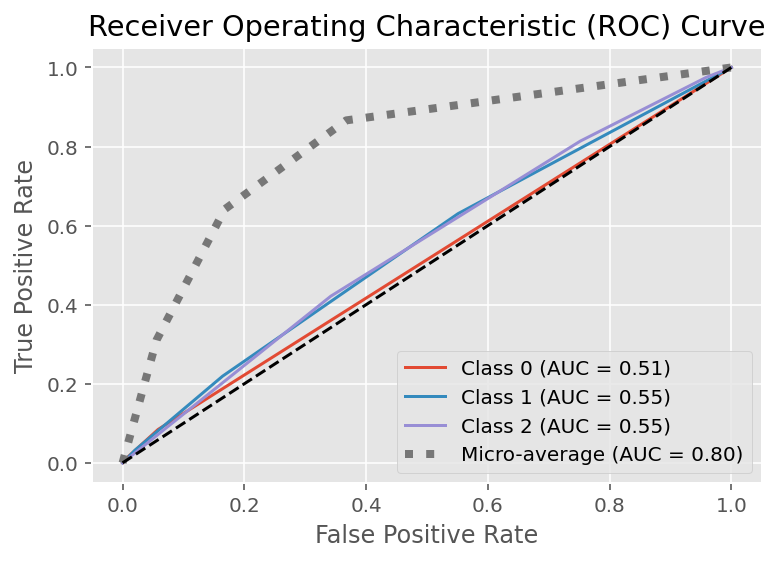

In [237]:
# Convert the target variable to binary format
y_test_binary = label_binarize(y_test, classes=np.unique(y))

# Obtain the predicted probabilities for the test set
y_scores = knn.predict_proba(X_test)

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curves for each class
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = %0.2f)' % roc_auc_micro, linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [238]:
n_splits = 10 # Define the number of folds for k-fold cross-validation
# Create the K-fold cross-validation object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
# Create a list to store the accuracy scores for each fold
accuracy_scores = []
# Iterate over each fold
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the KNN classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score in the list
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / n_splits

# Print the average accuracy
print(f'Average accuracy: {average_accuracy}')

Average accuracy: 0.6690895669075152


In [239]:
# Define the number of folds for stratified k-fold cross-validation
n_splits = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a list to store the accuracy scores for each fold
accuracy_scores = []

# Iterate over each fold
for train_index, test_index in skf.split(X, y):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the KNN classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score in the list
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / n_splits

# Print the average accuracy
print(f'Average accuracy: {average_accuracy}')

Average accuracy: 0.6693401987027724


In [240]:
# Define a range of values for K
k_values = [1, 3, 5, 7, 9] 
# by using high values of k average accuracy will be better.
# Perform cross-validation for each value of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # Use 5-fold cross-validation
    average_accuracy = scores.mean()
    print(f'K={k}: Average accuracy = {average_accuracy:.2f}')

K=1: Average accuracy = 0.37
K=3: Average accuracy = 0.38
K=5: Average accuracy = 0.39
K=7: Average accuracy = 0.40
K=9: Average accuracy = 0.40
